In [1]:
import lightkurve as lk
from exovetter.tce import Tce
from exovetter import vetters as vet
import matplotlib.pyplot as plt
%matplotlib notebook

%load_ext autoreload
%autoreload 2

## Running the centroid vetter on a known exoplanet

We use the previously downloaded lightcurve and TCE of wasp 18b to run the vetter (see the TCE and lightcurve example notebook)  

In [2]:
tce = Tce.from_json('wasp18b_tce')

# View the tce and flattened lightcurve we're vetting: 
display(tce)


{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 58374.669883 d>,
 'epoch_offset': <Quantity -2400000.5 d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'snr': 50,
 'event_name': 'WASP-18 b',
 'target_name': 'WASP-18'}

## Obtaining a target pixel file (tpf)

The centroid vetter is unique in that it requires a tpf rather than a lightcurve in order to run

In [3]:
search_result = lk.search_targetpixelfile(target = 'TIC100100827', sector=3, exptime=1800)
display(search_result)
tpf = search_result.download()

SearchResult containing 1 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 03 2018 TESS-SPOC    1800   100100827      0.0

<IPython.core.display.Javascript object>


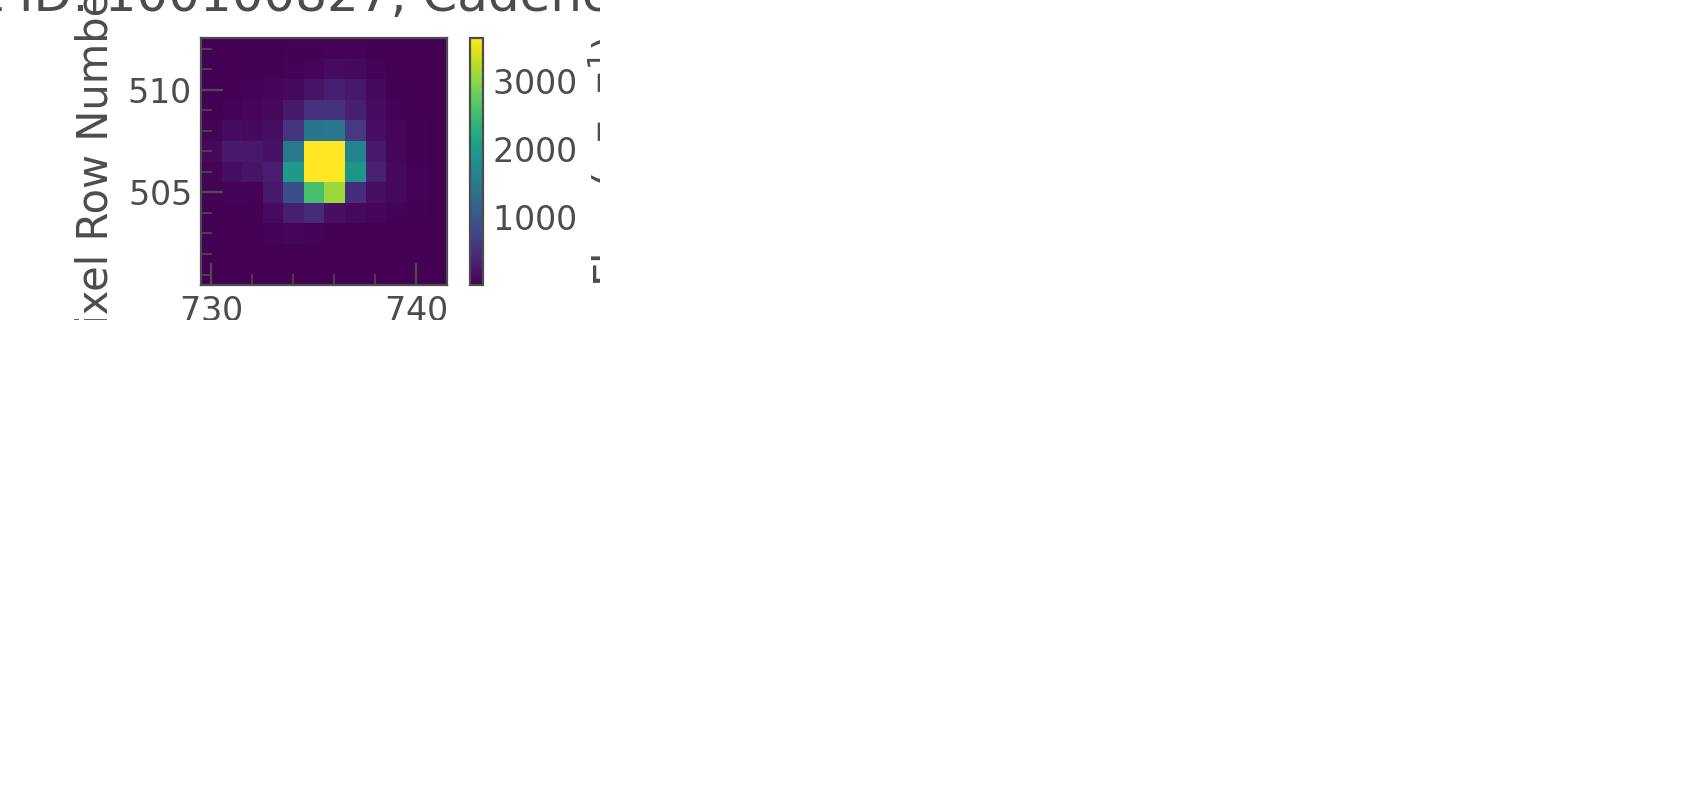

In [4]:
tpf.plot()
plt.show()

## Centroid

Description

In [5]:
# We initialize the centroid object 
# using the name of whatever array we want to be flux from the light_curve object 
centroid = vet.Centroid(lc_name="flux")

# We then run the vetter on the desired TCE and lightcurve which results in a dictionary of relevent metrics
centroid_results = centroid.run(tce,tpf)

print("Results from centroid:")
display(centroid_results)

Results from centroid:


{'offset': 0.3120732981252742, 'significance': array([0.13463567])}

<IPython.core.display.Javascript object>


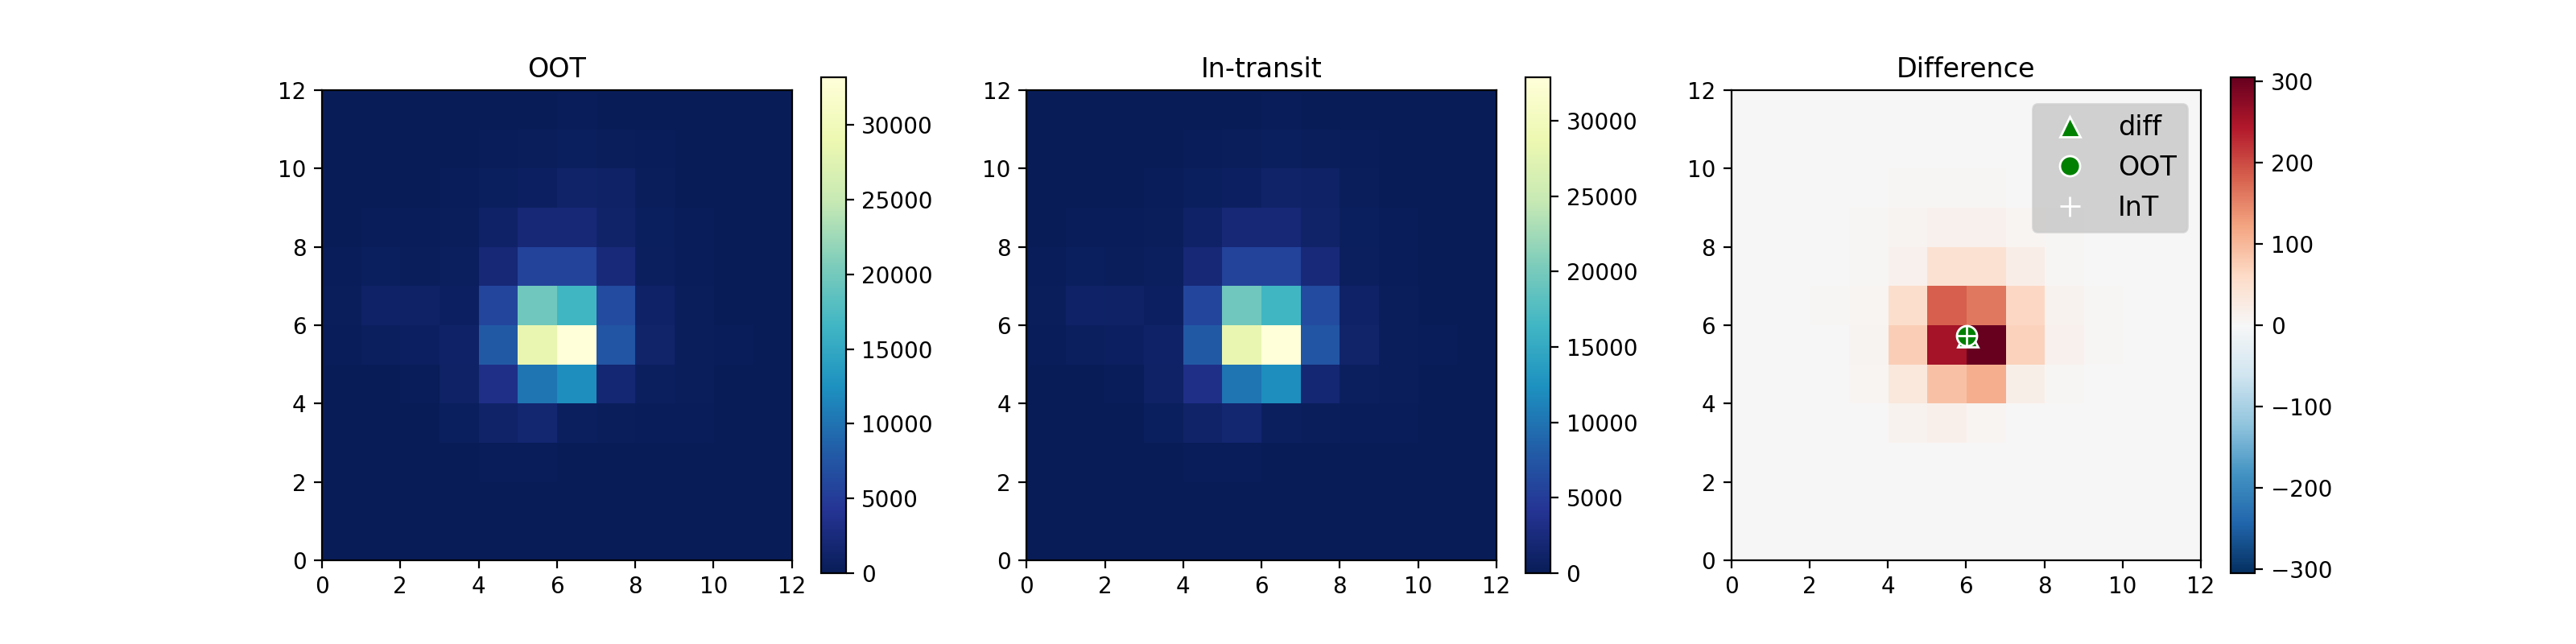

<IPython.core.display.Javascript object>


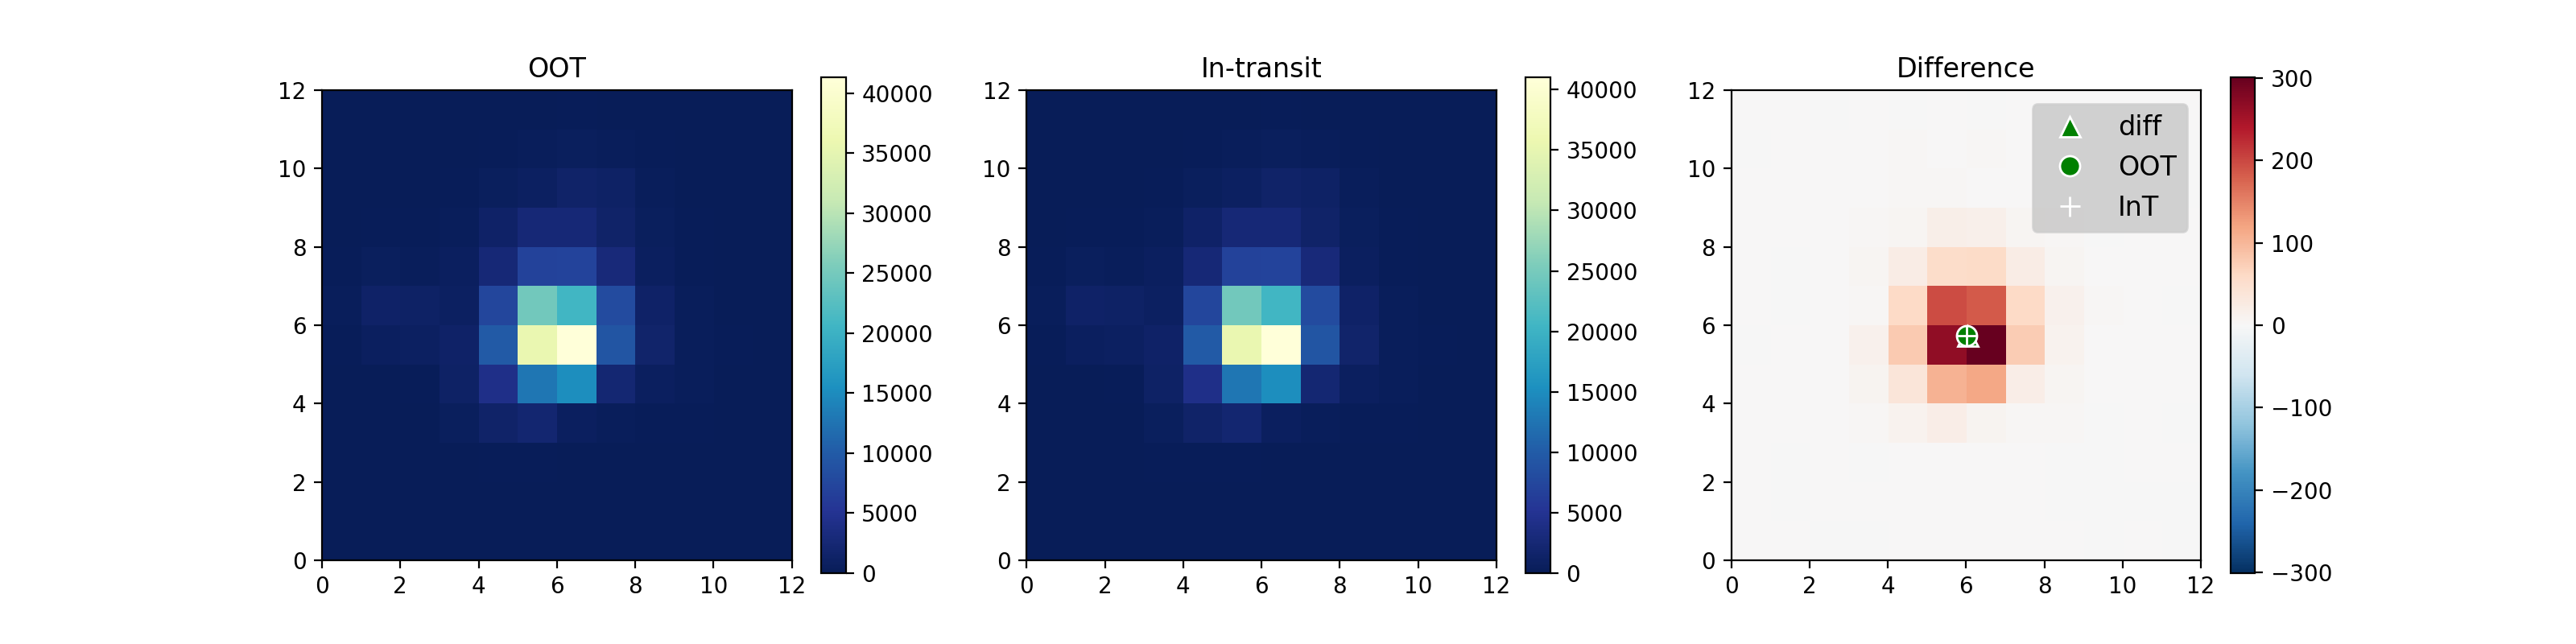

<IPython.core.display.Javascript object>


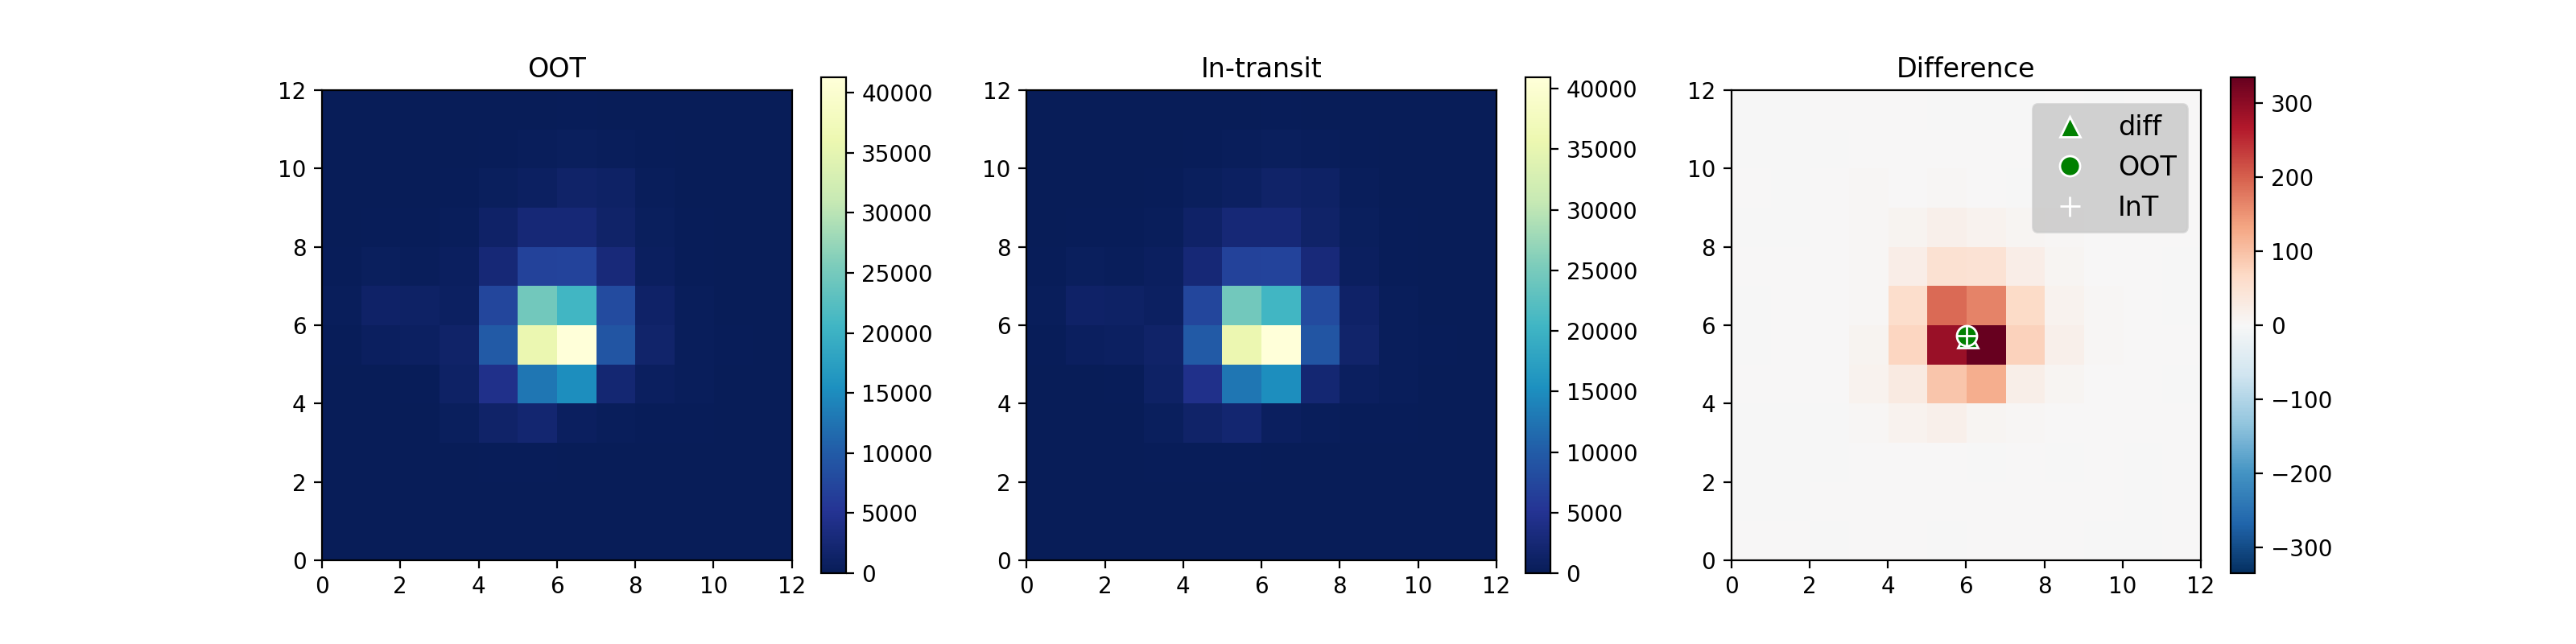

<IPython.core.display.Javascript object>


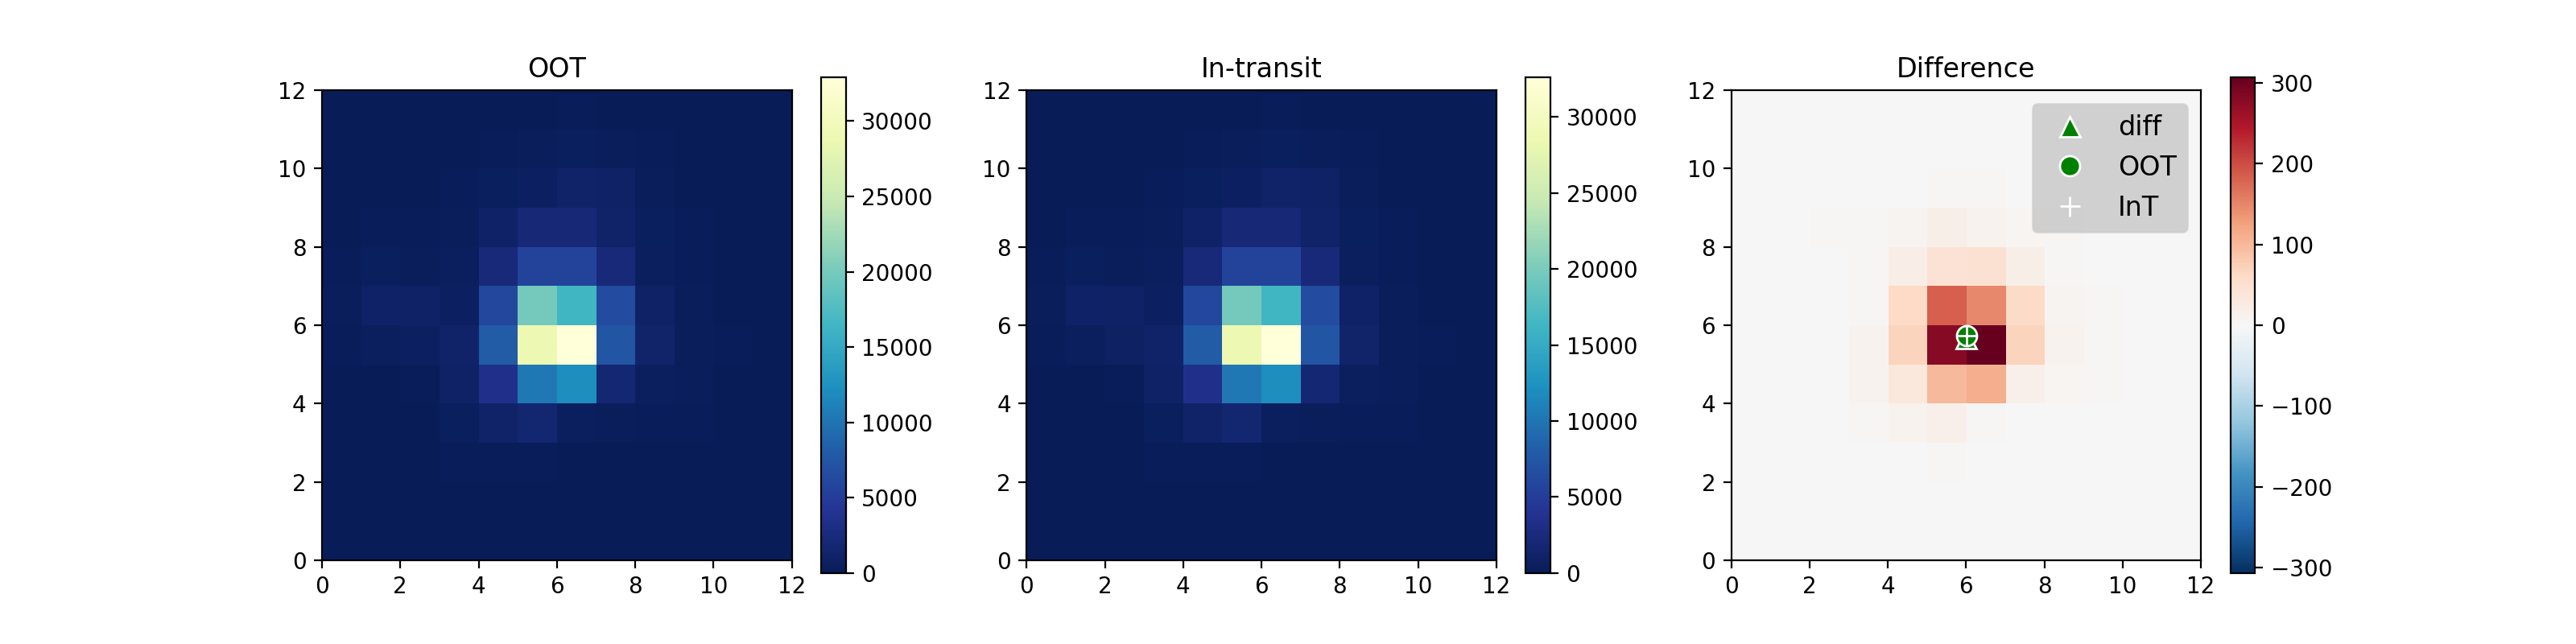

<IPython.core.display.Javascript object>


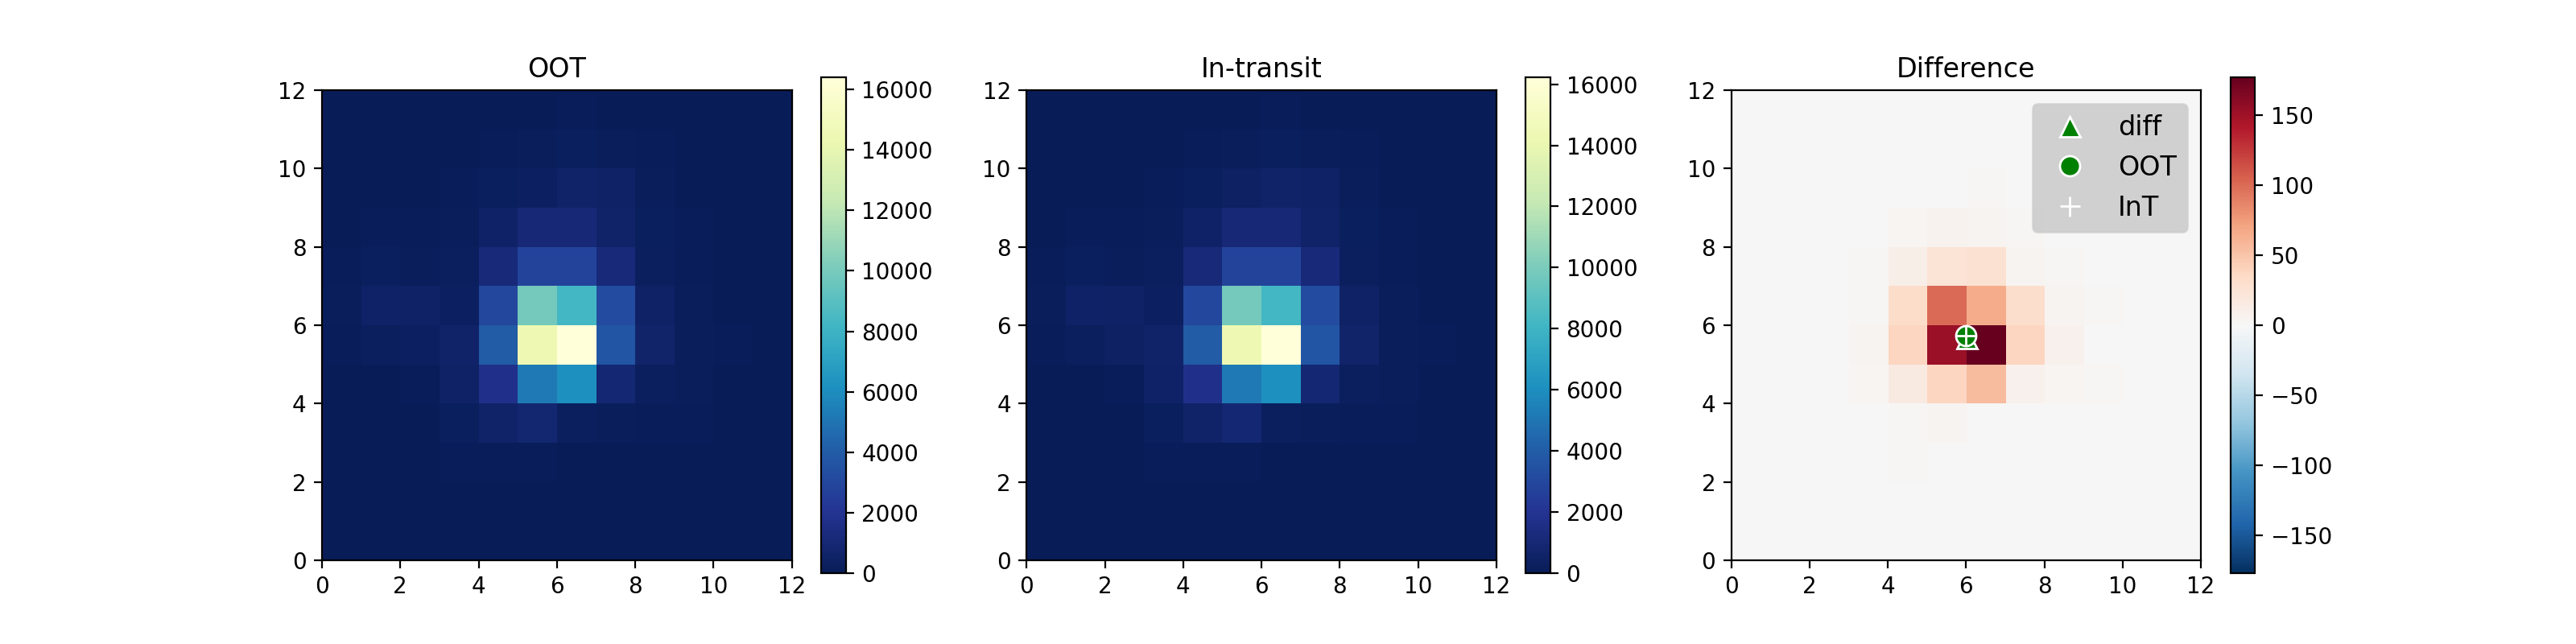

<IPython.core.display.Javascript object>


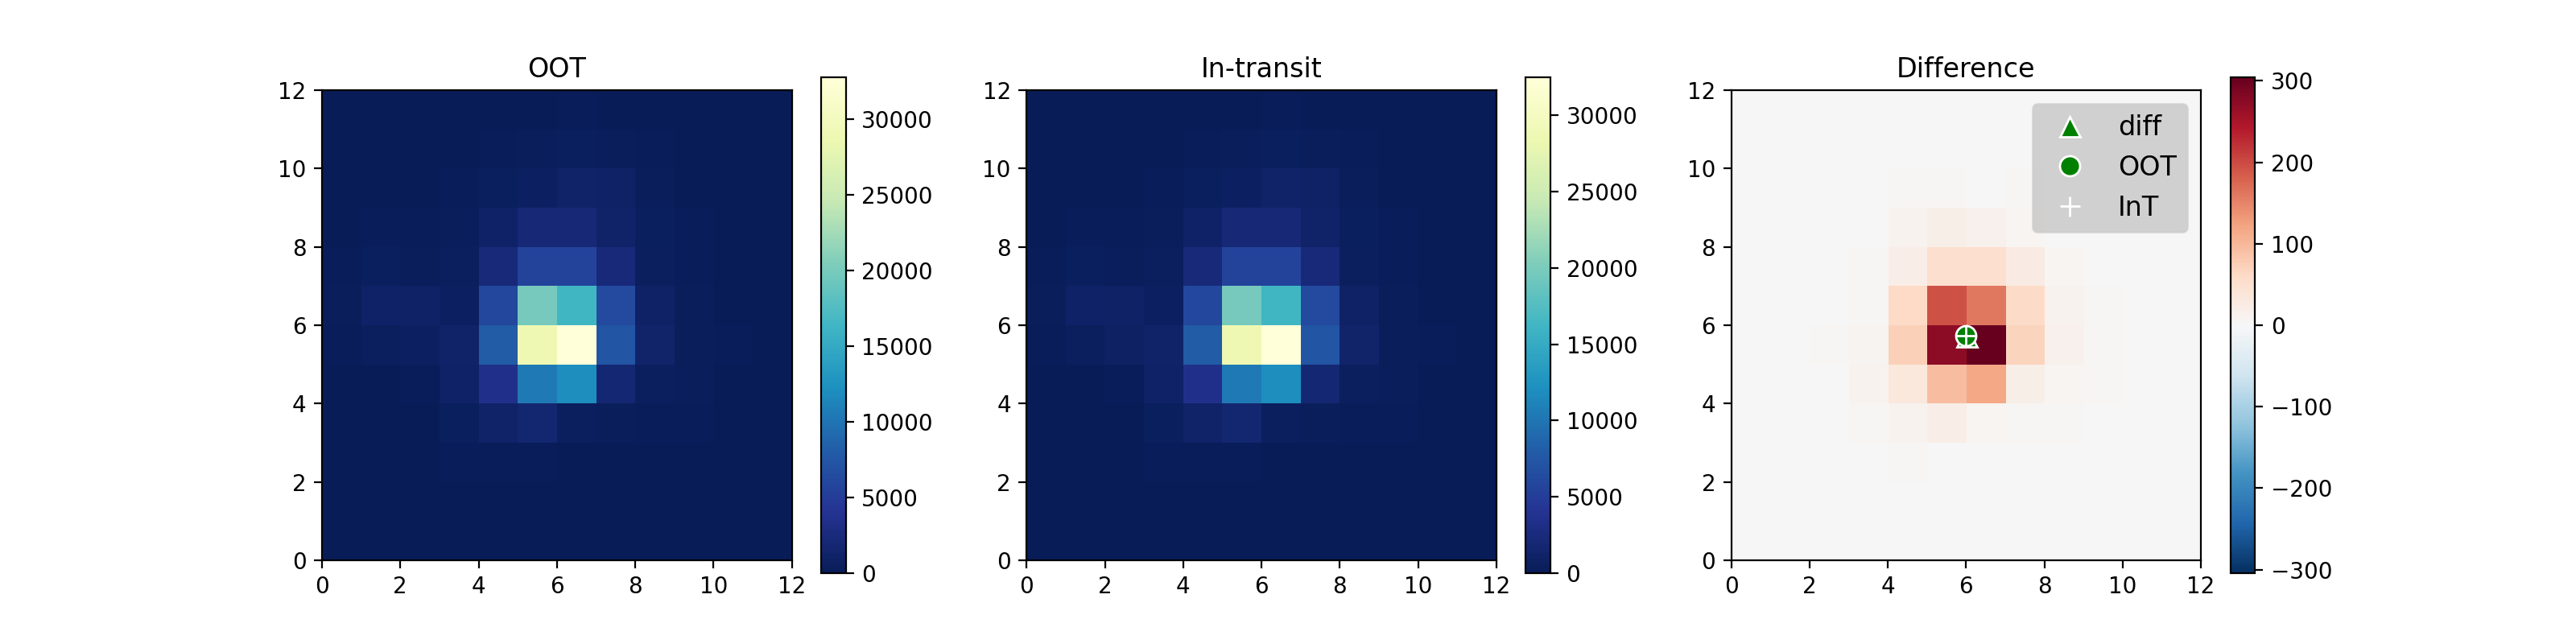

<IPython.core.display.Javascript object>


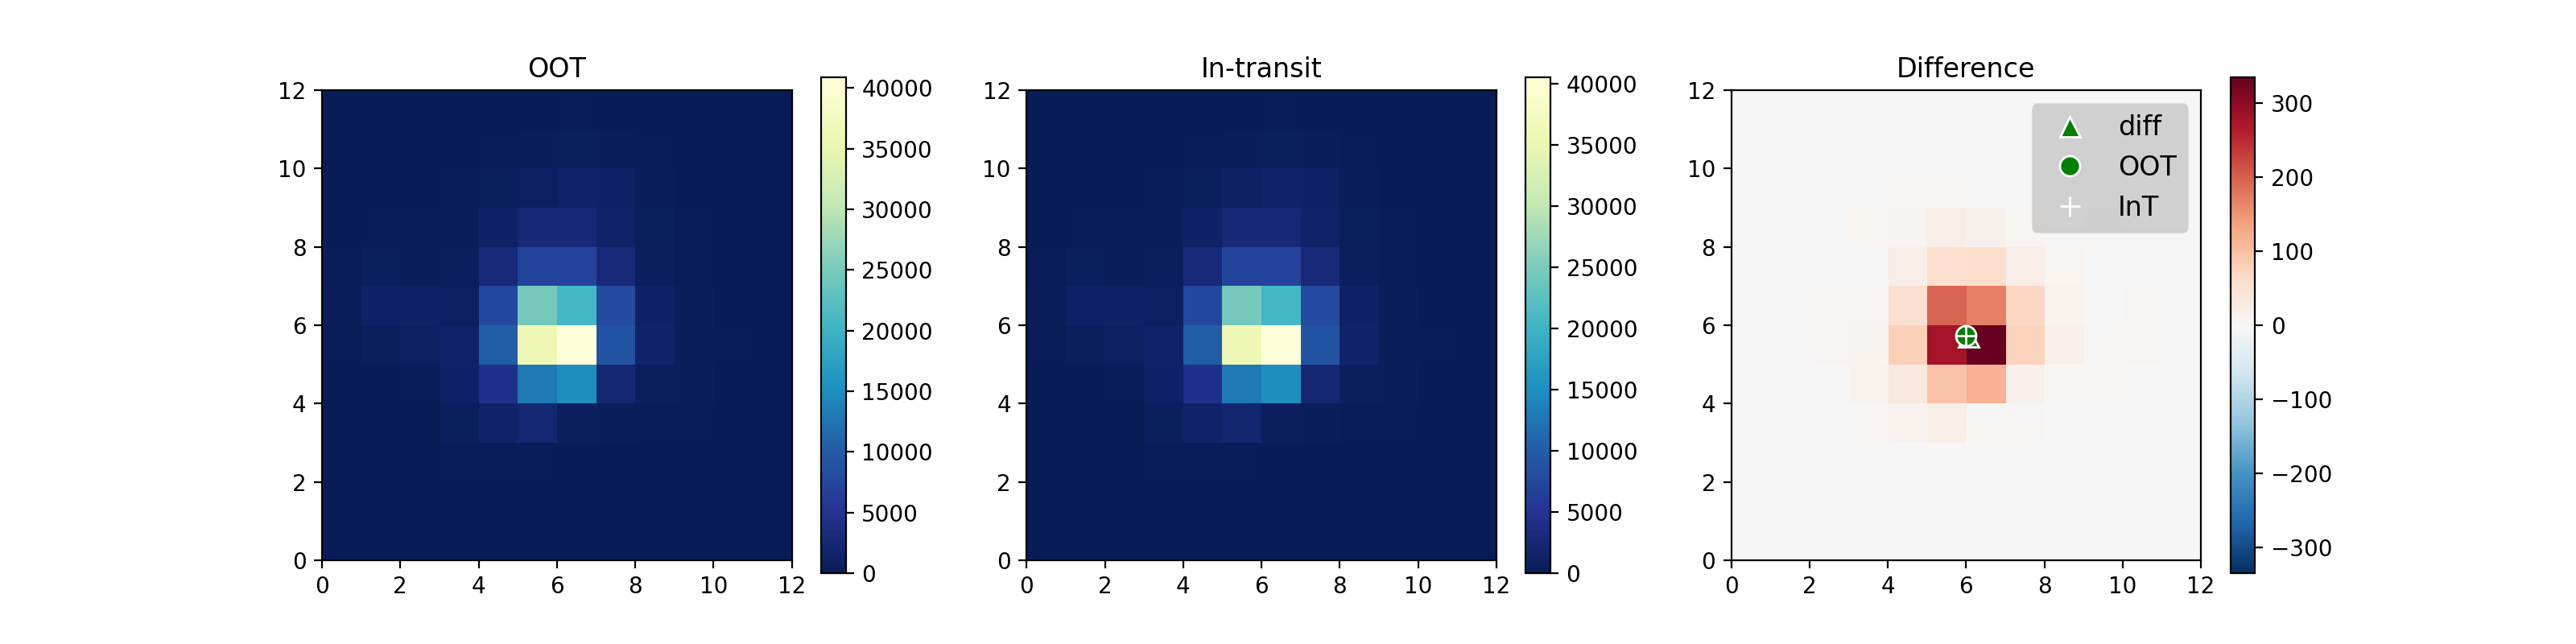

<IPython.core.display.Javascript object>


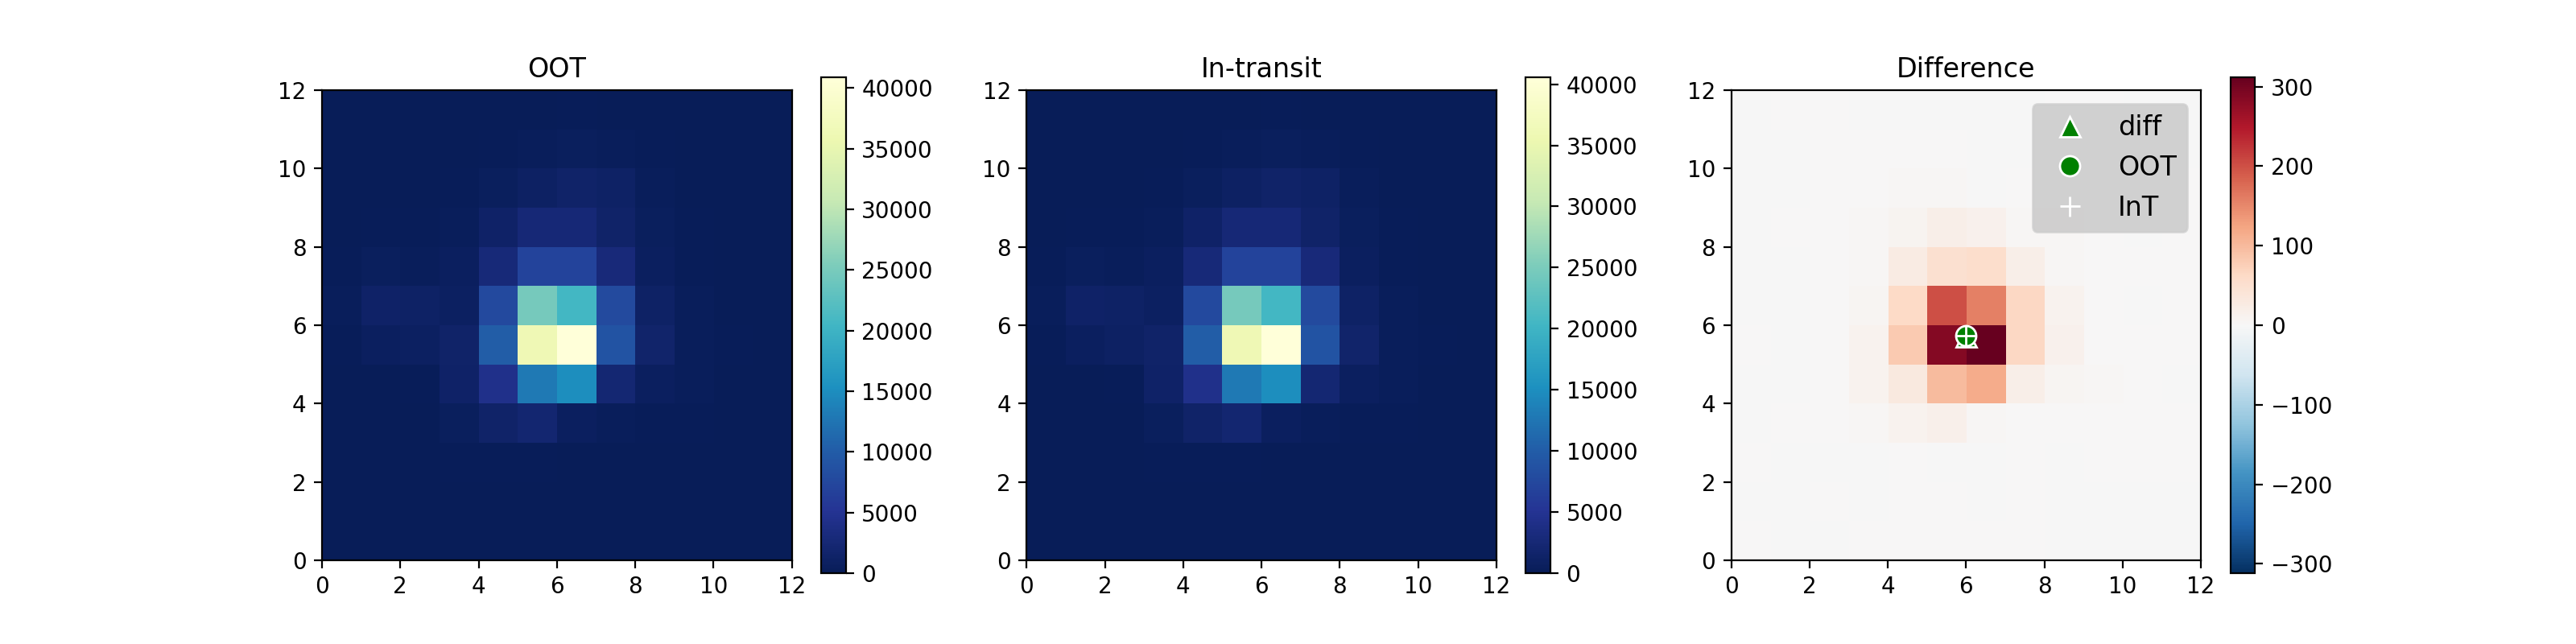

<IPython.core.display.Javascript object>


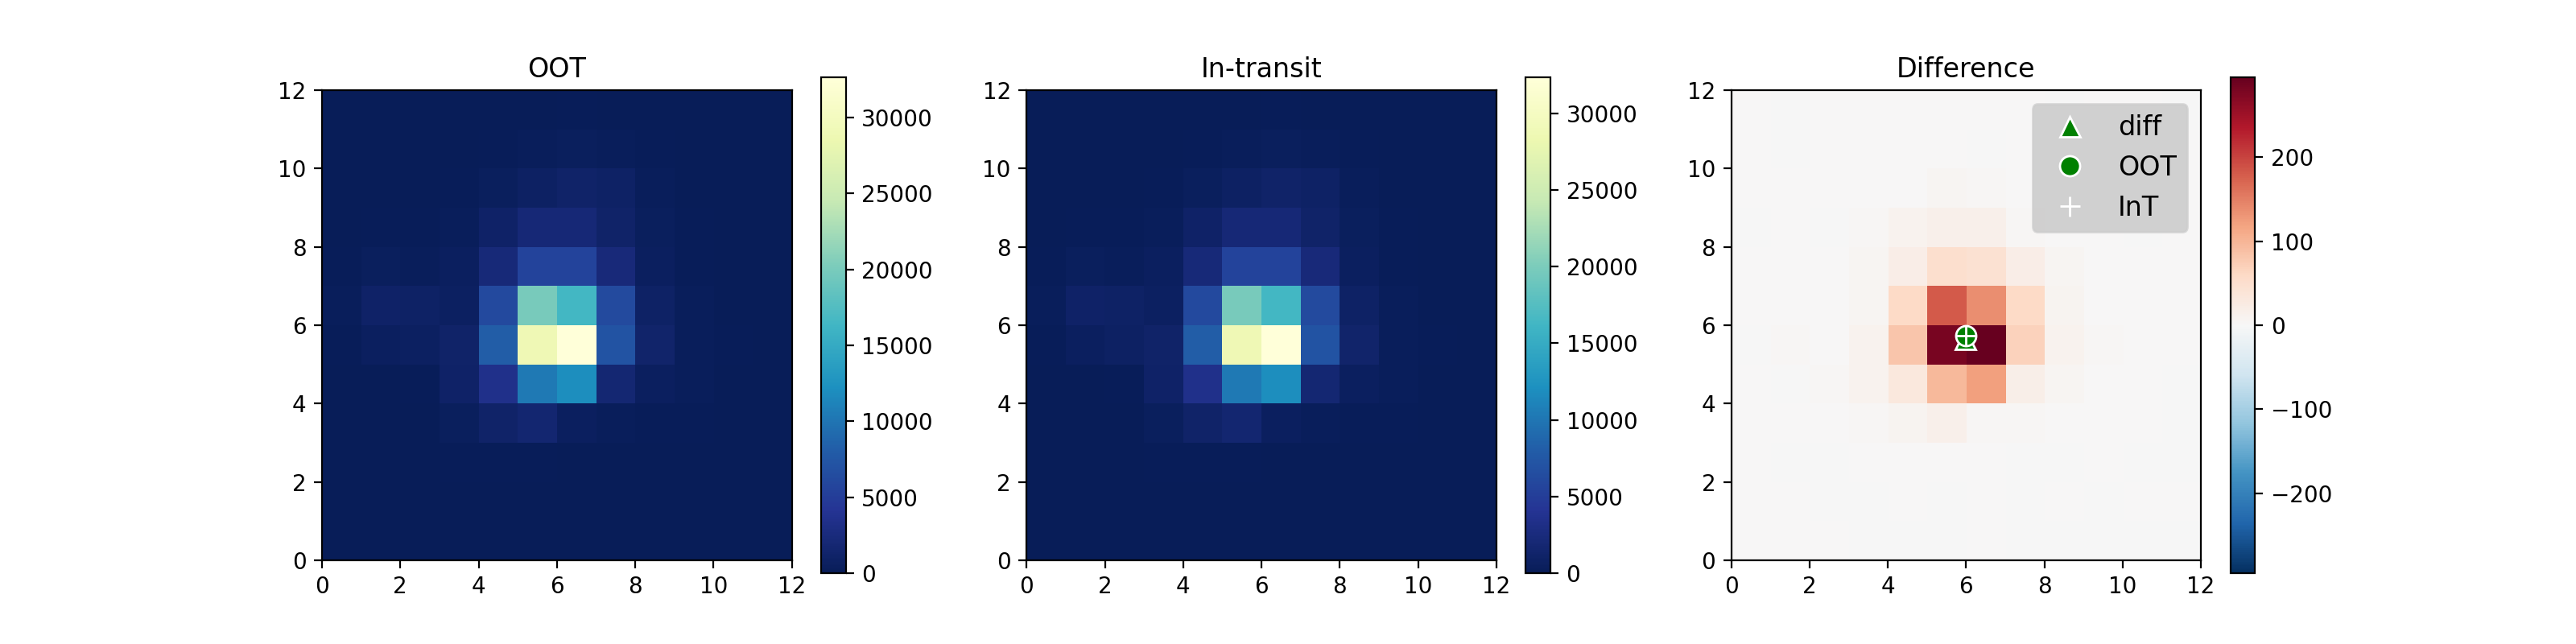

<IPython.core.display.Javascript object>


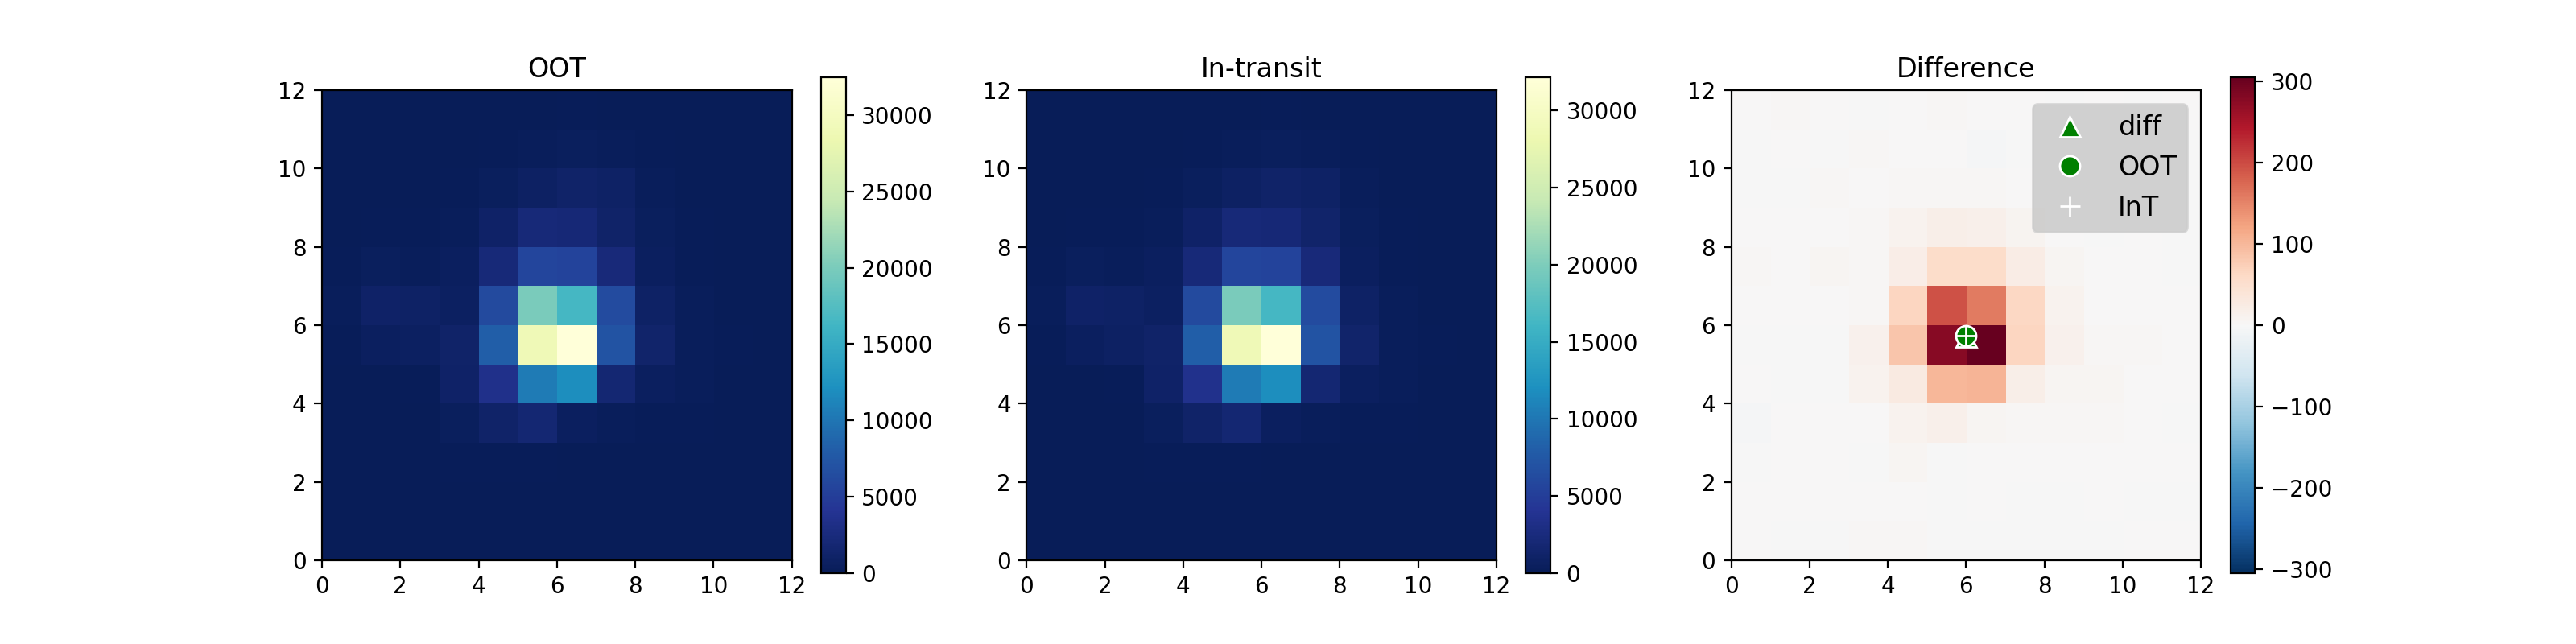

<IPython.core.display.Javascript object>


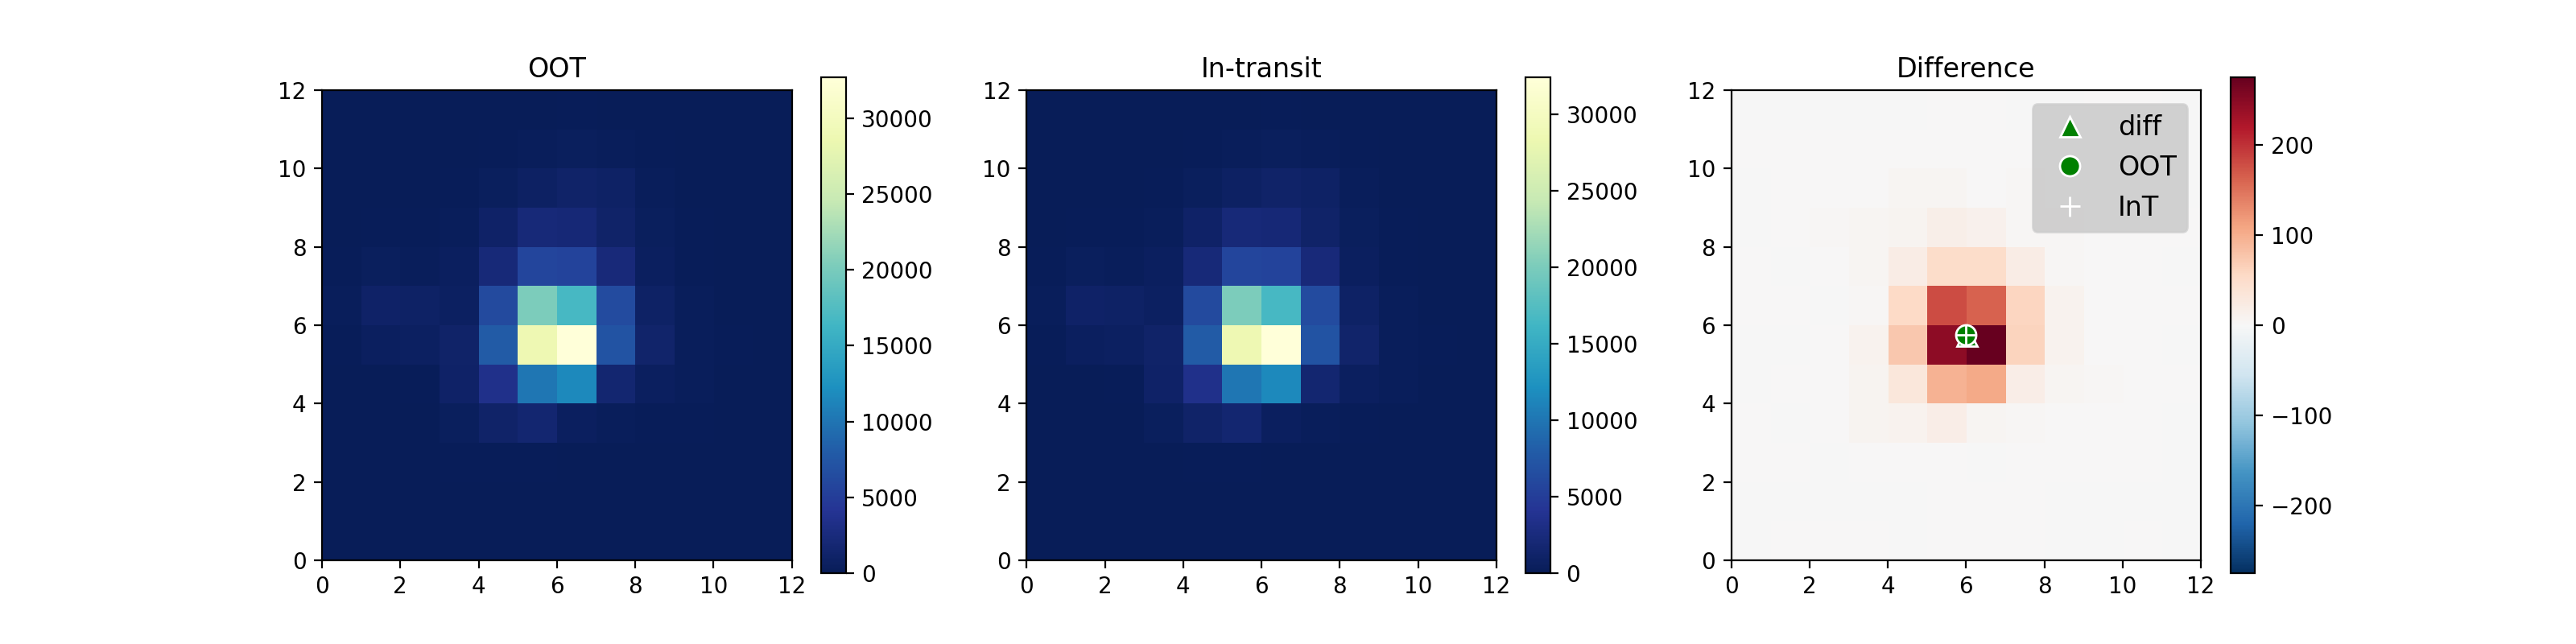

<IPython.core.display.Javascript object>


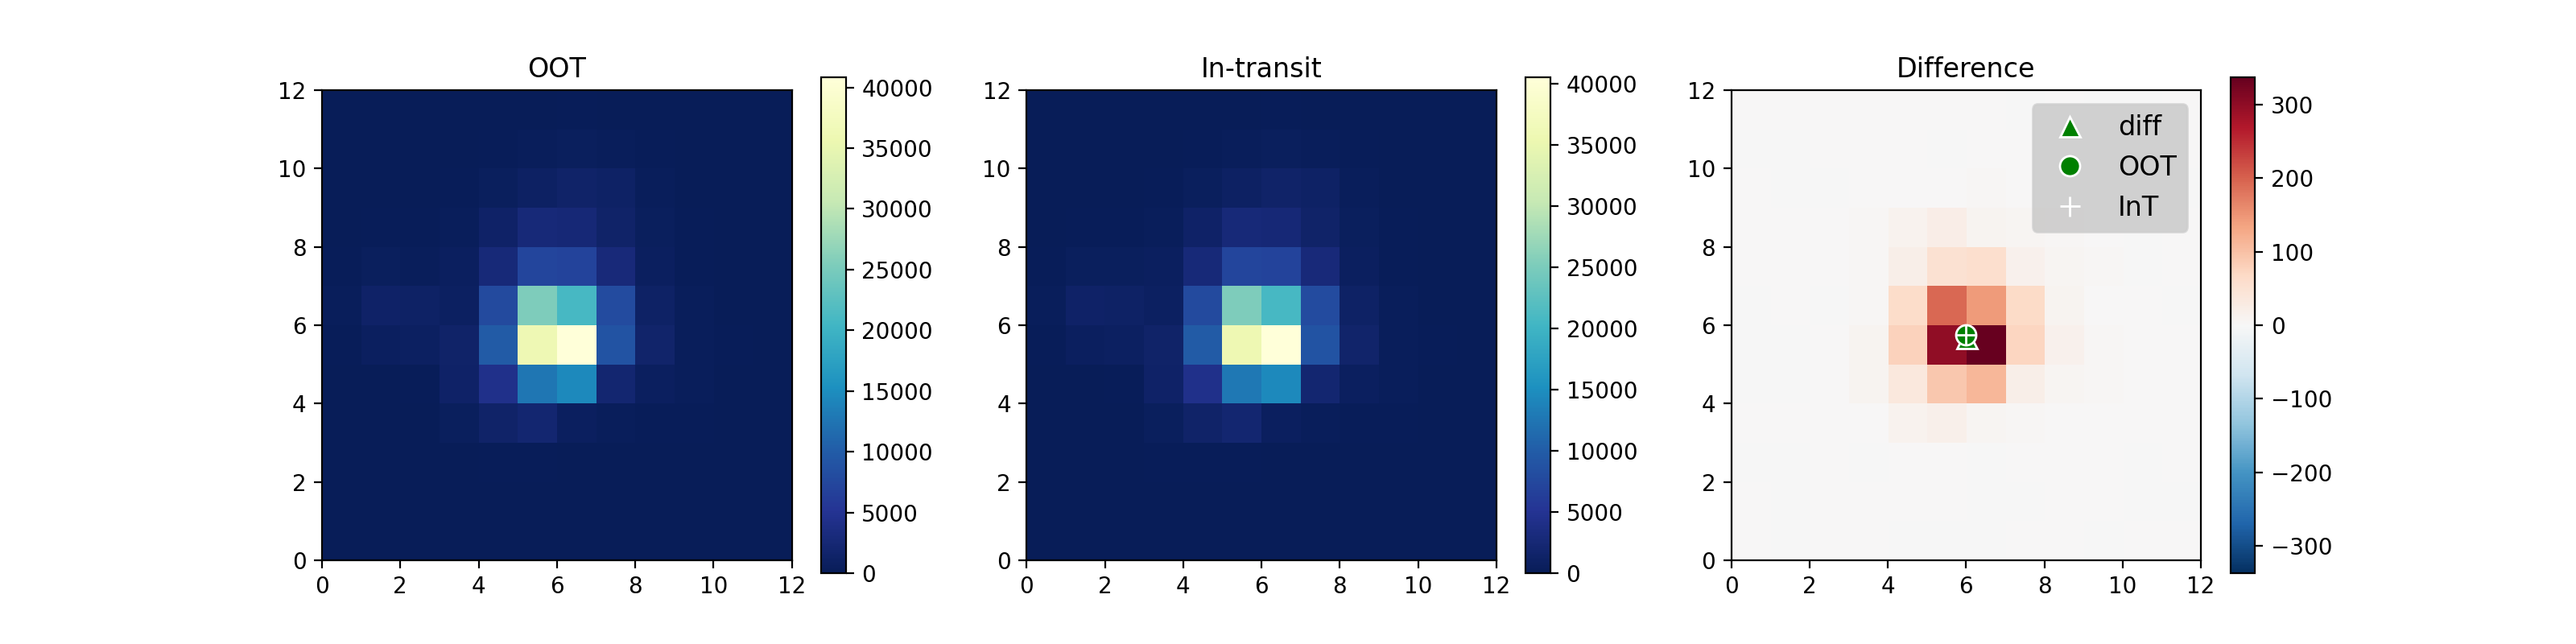

<IPython.core.display.Javascript object>


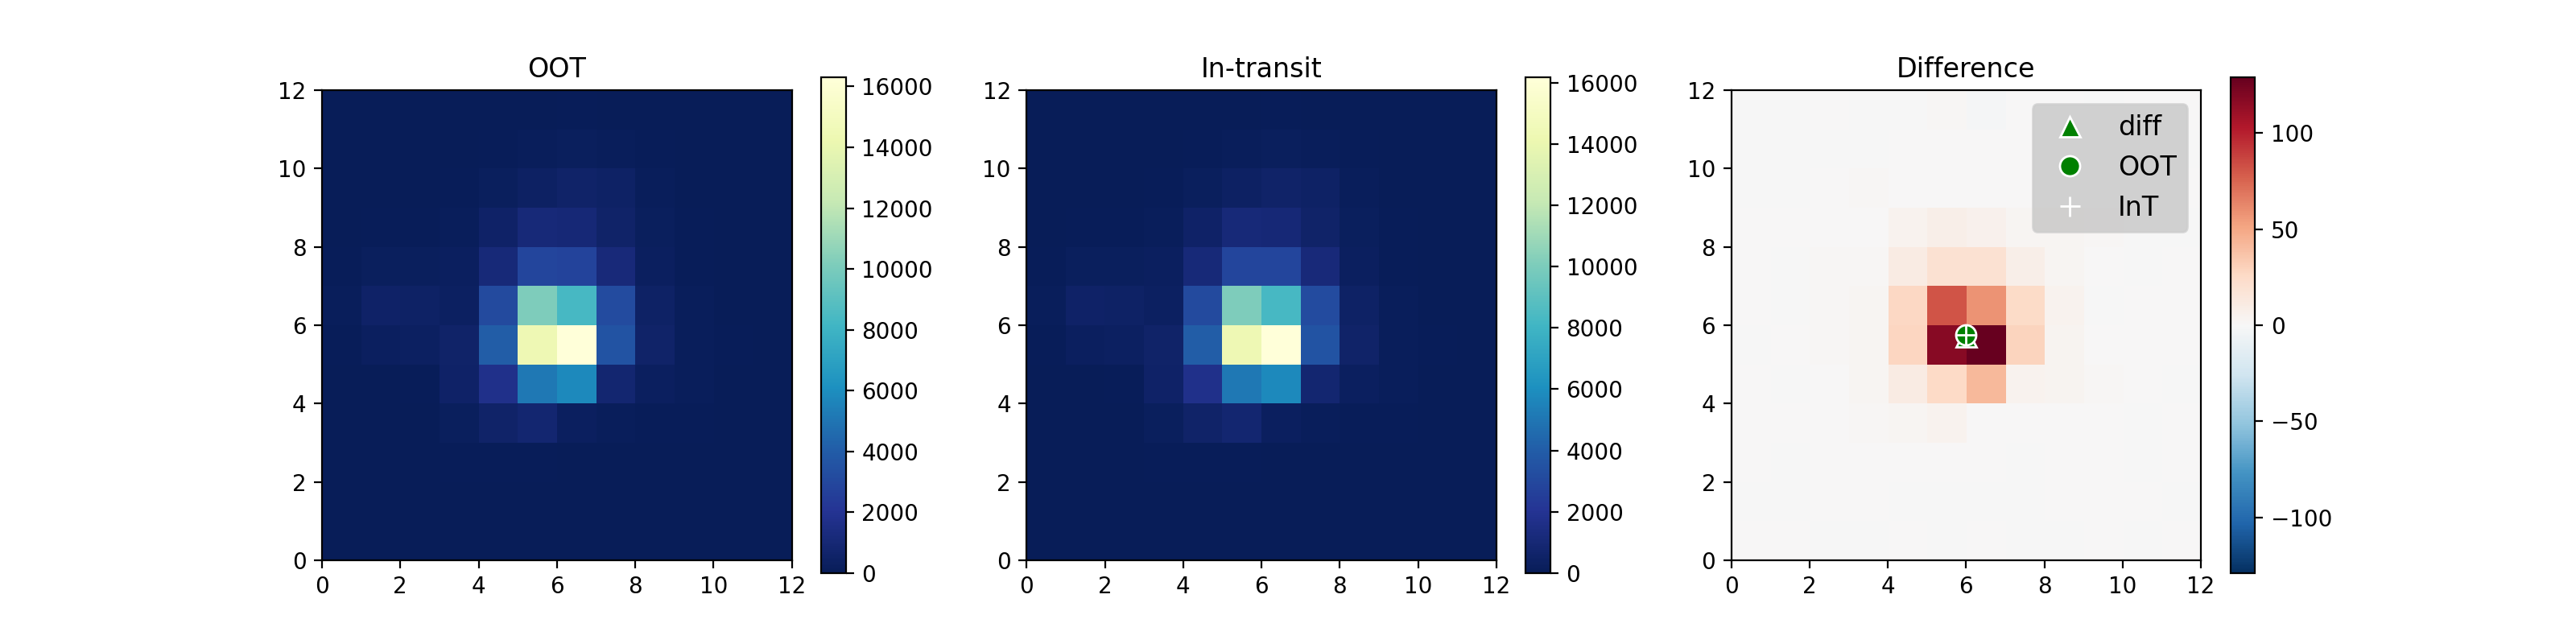

<IPython.core.display.Javascript object>


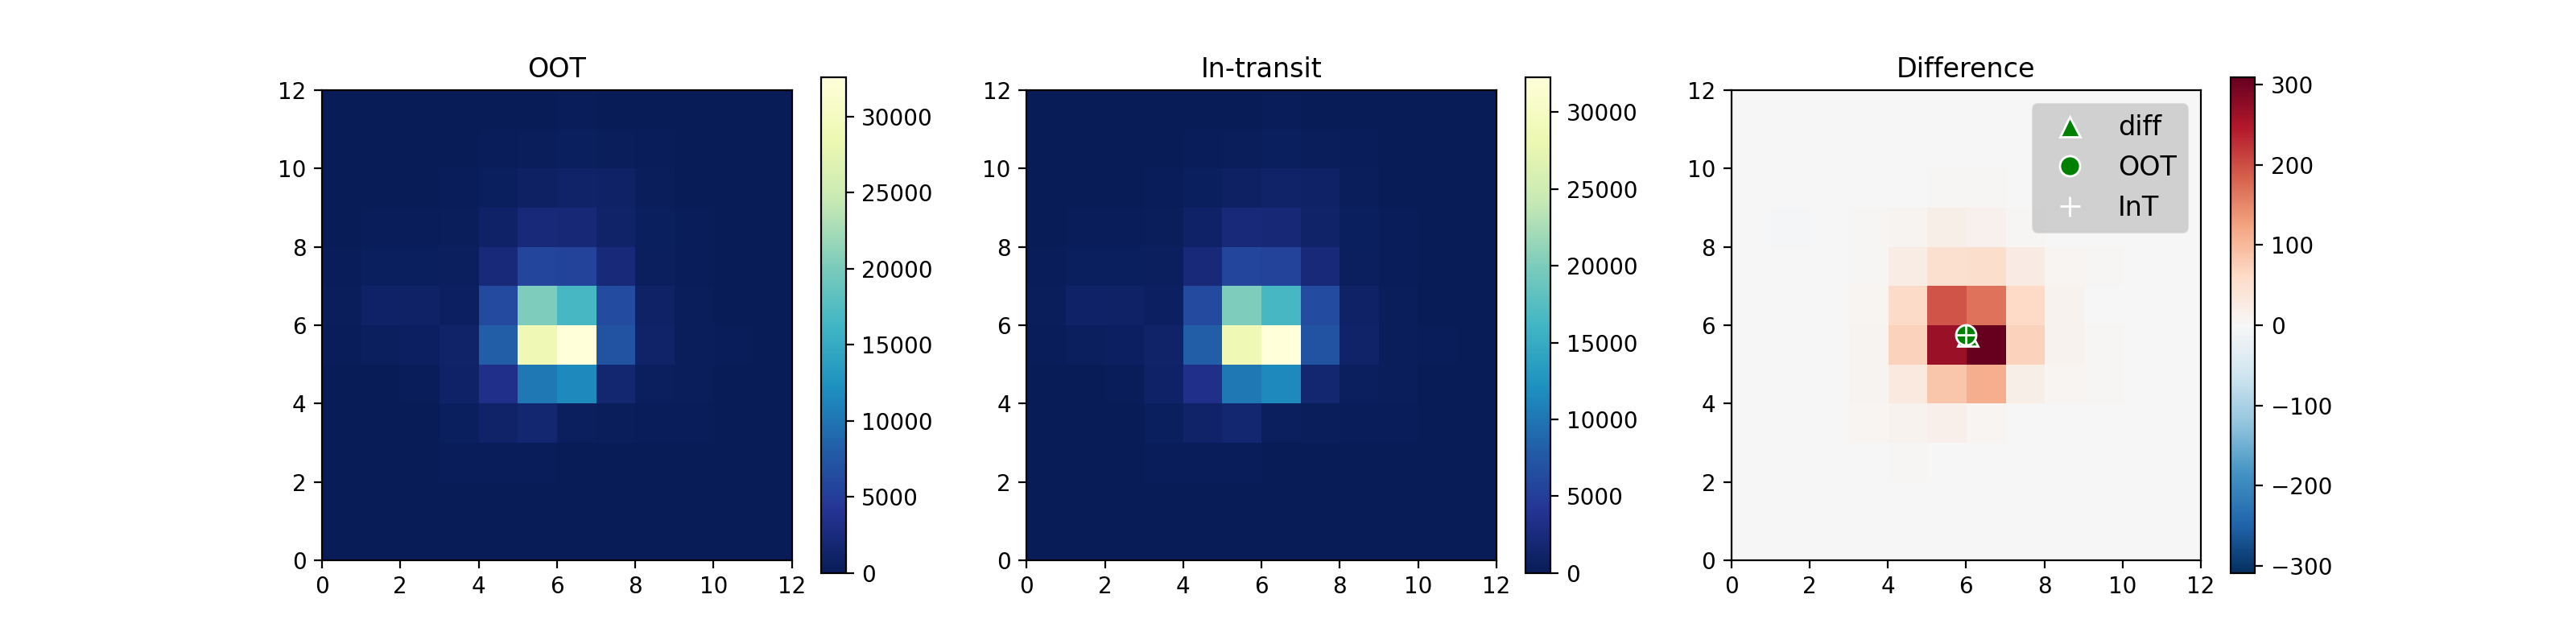

<IPython.core.display.Javascript object>


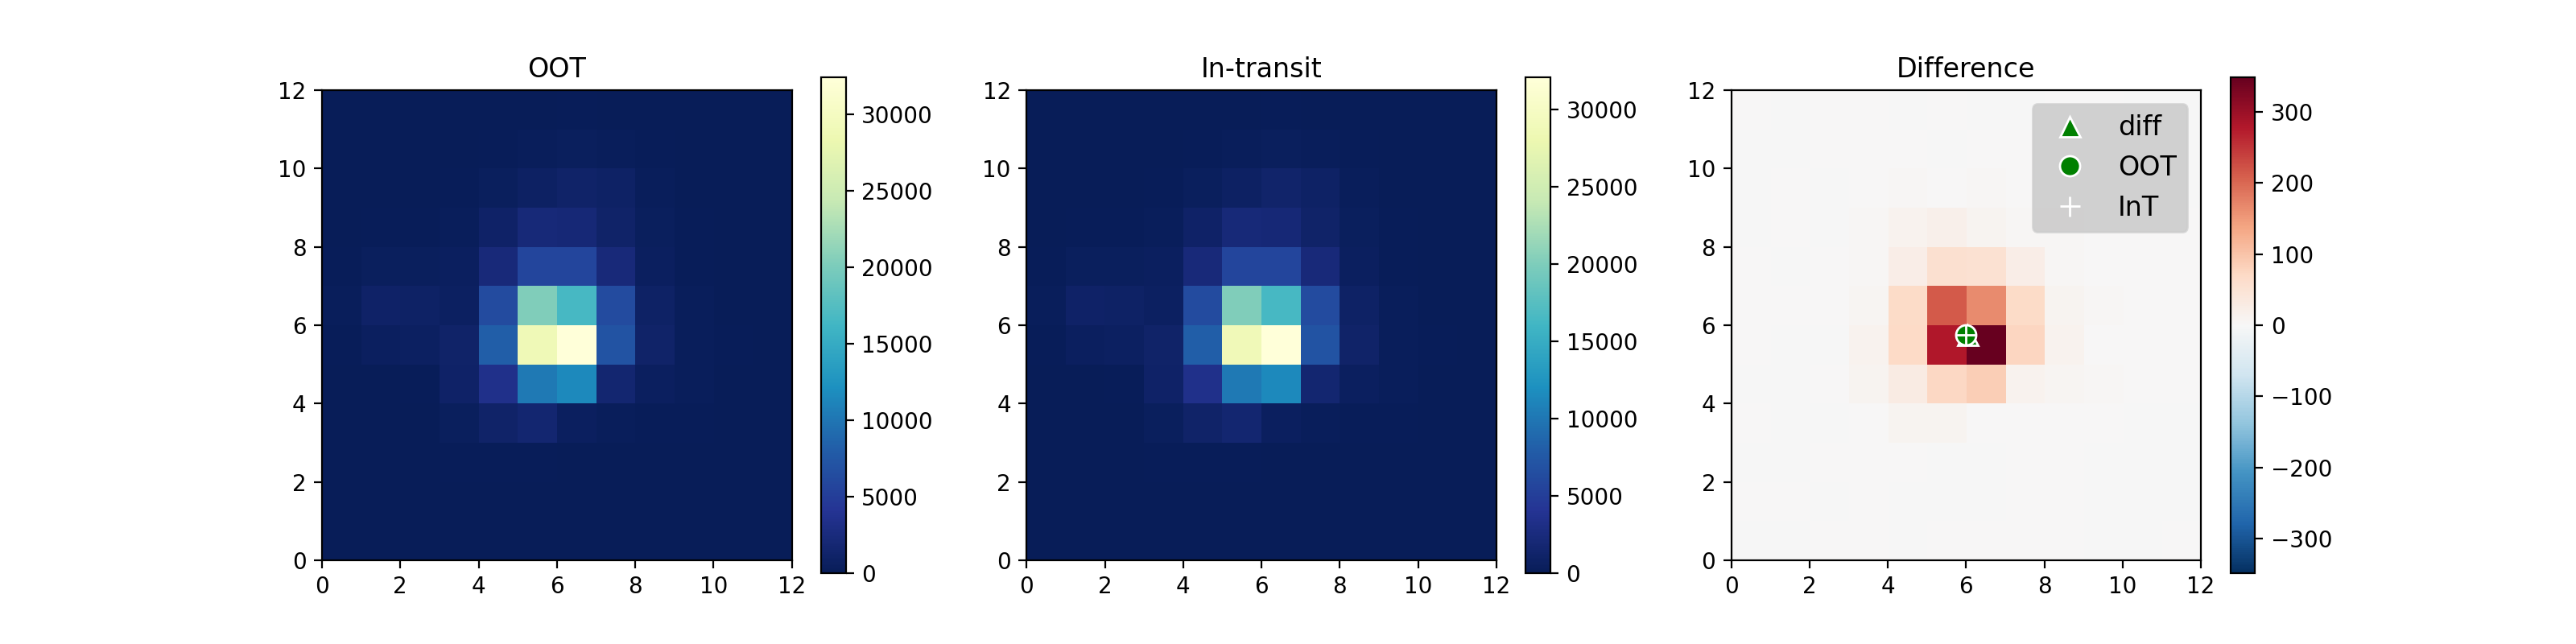

<IPython.core.display.Javascript object>


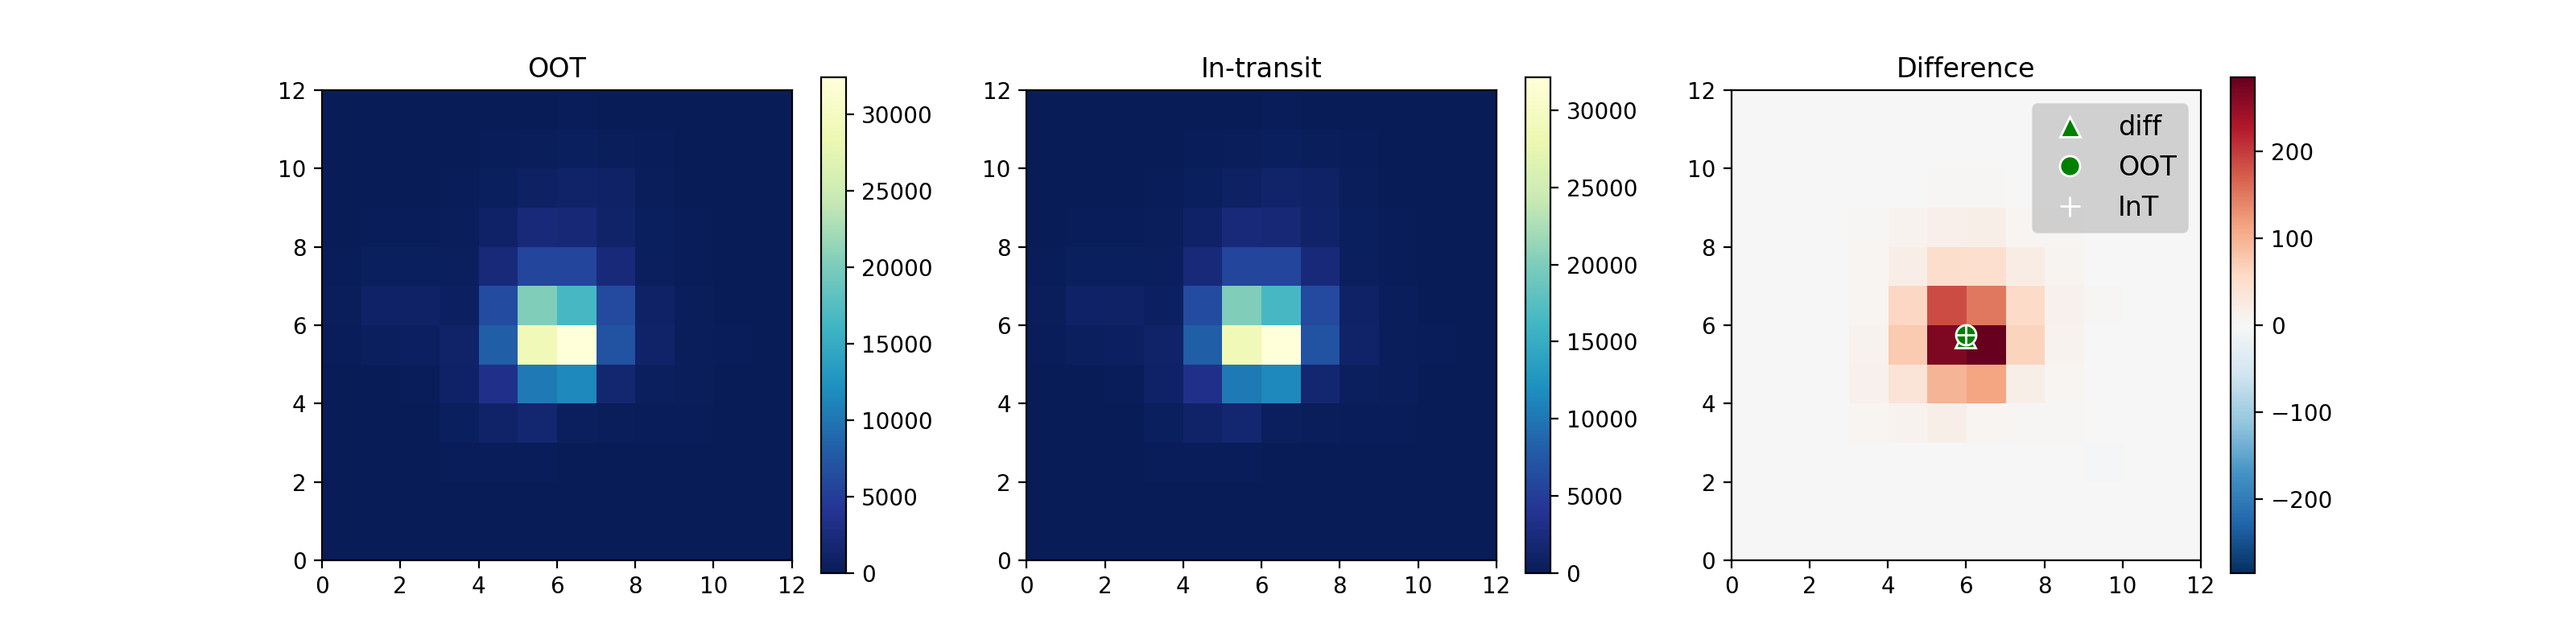

<IPython.core.display.Javascript object>


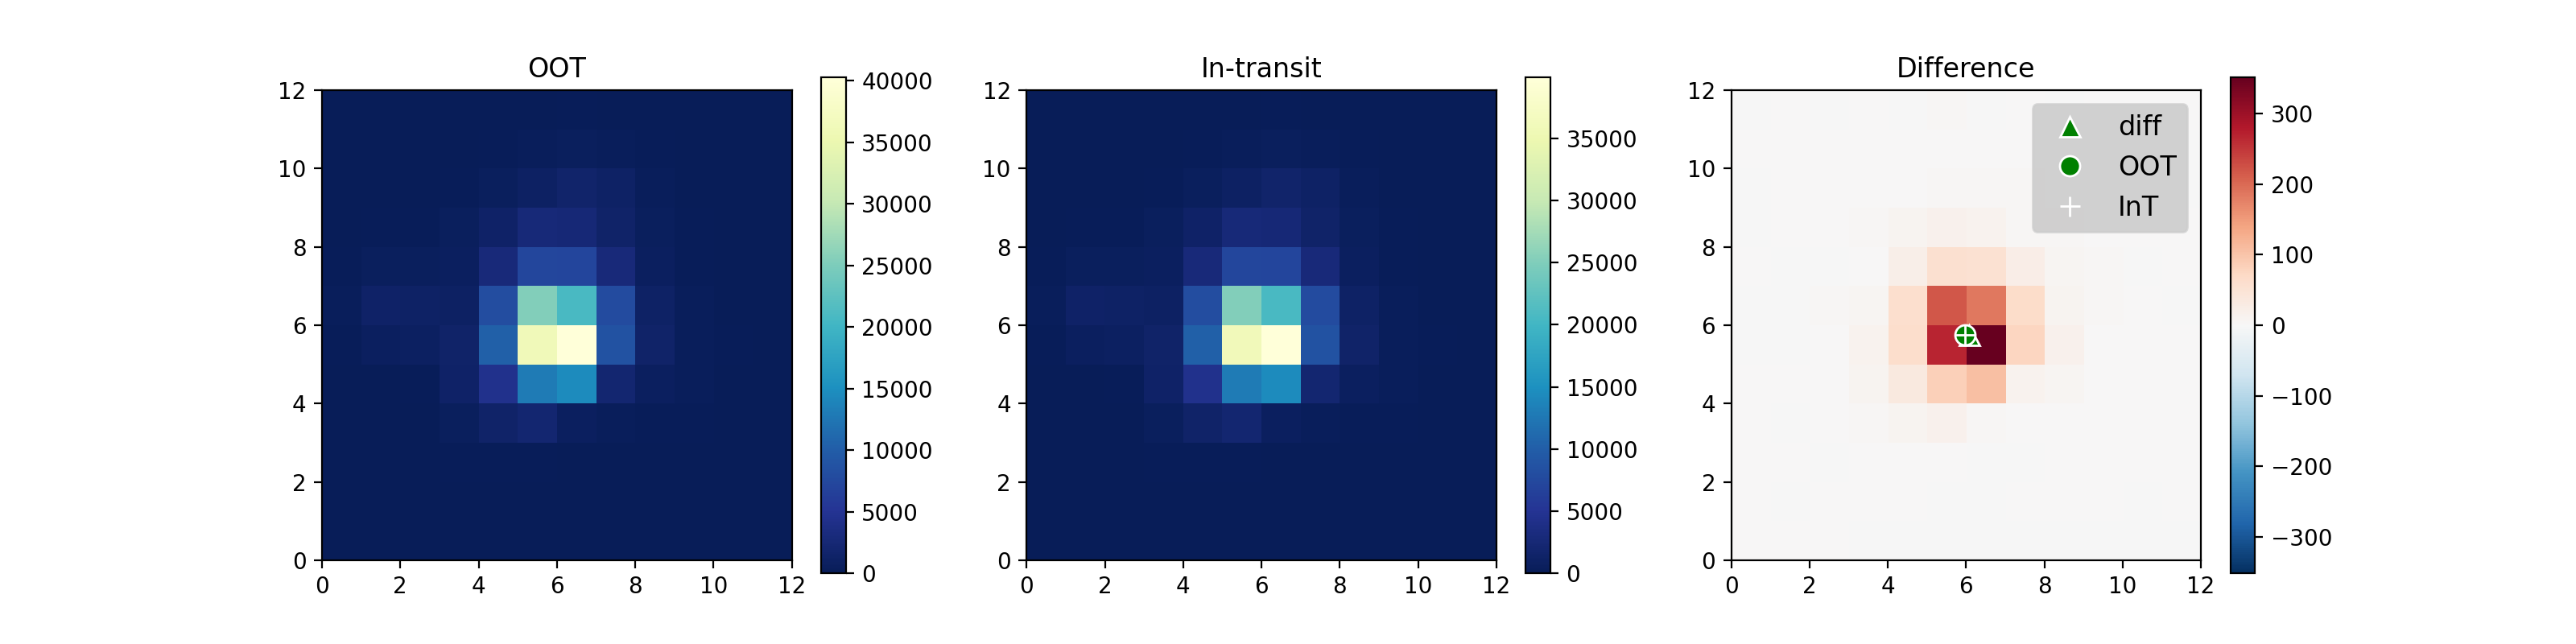

<IPython.core.display.Javascript object>


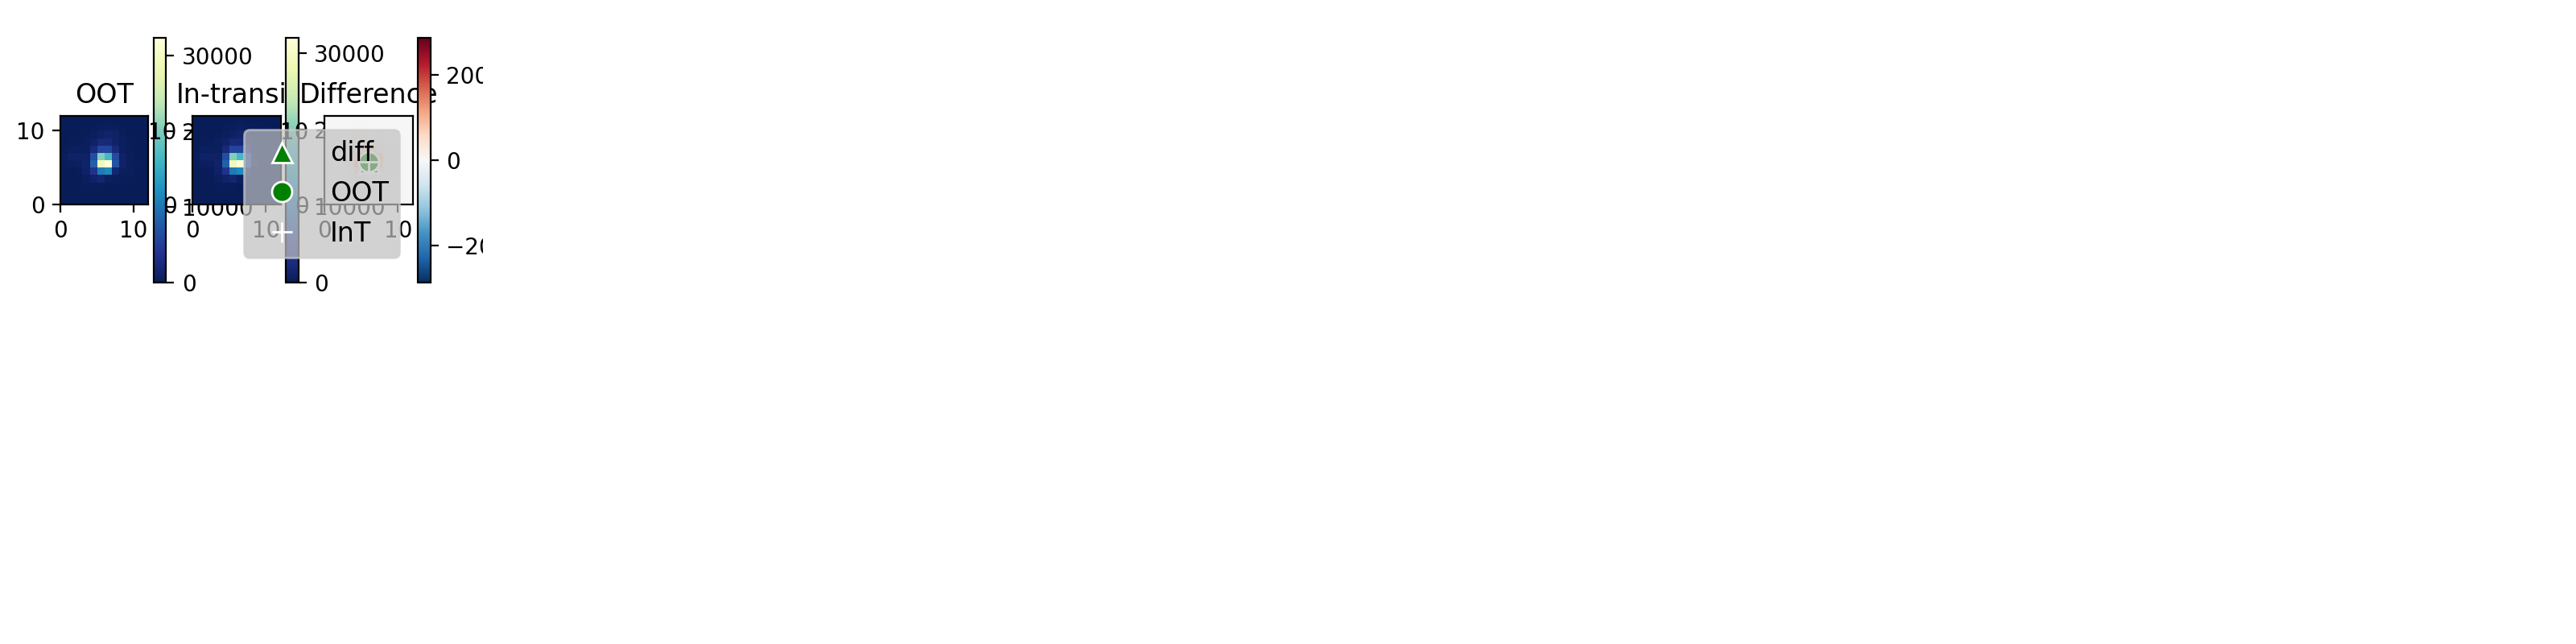

<IPython.core.display.Javascript object>


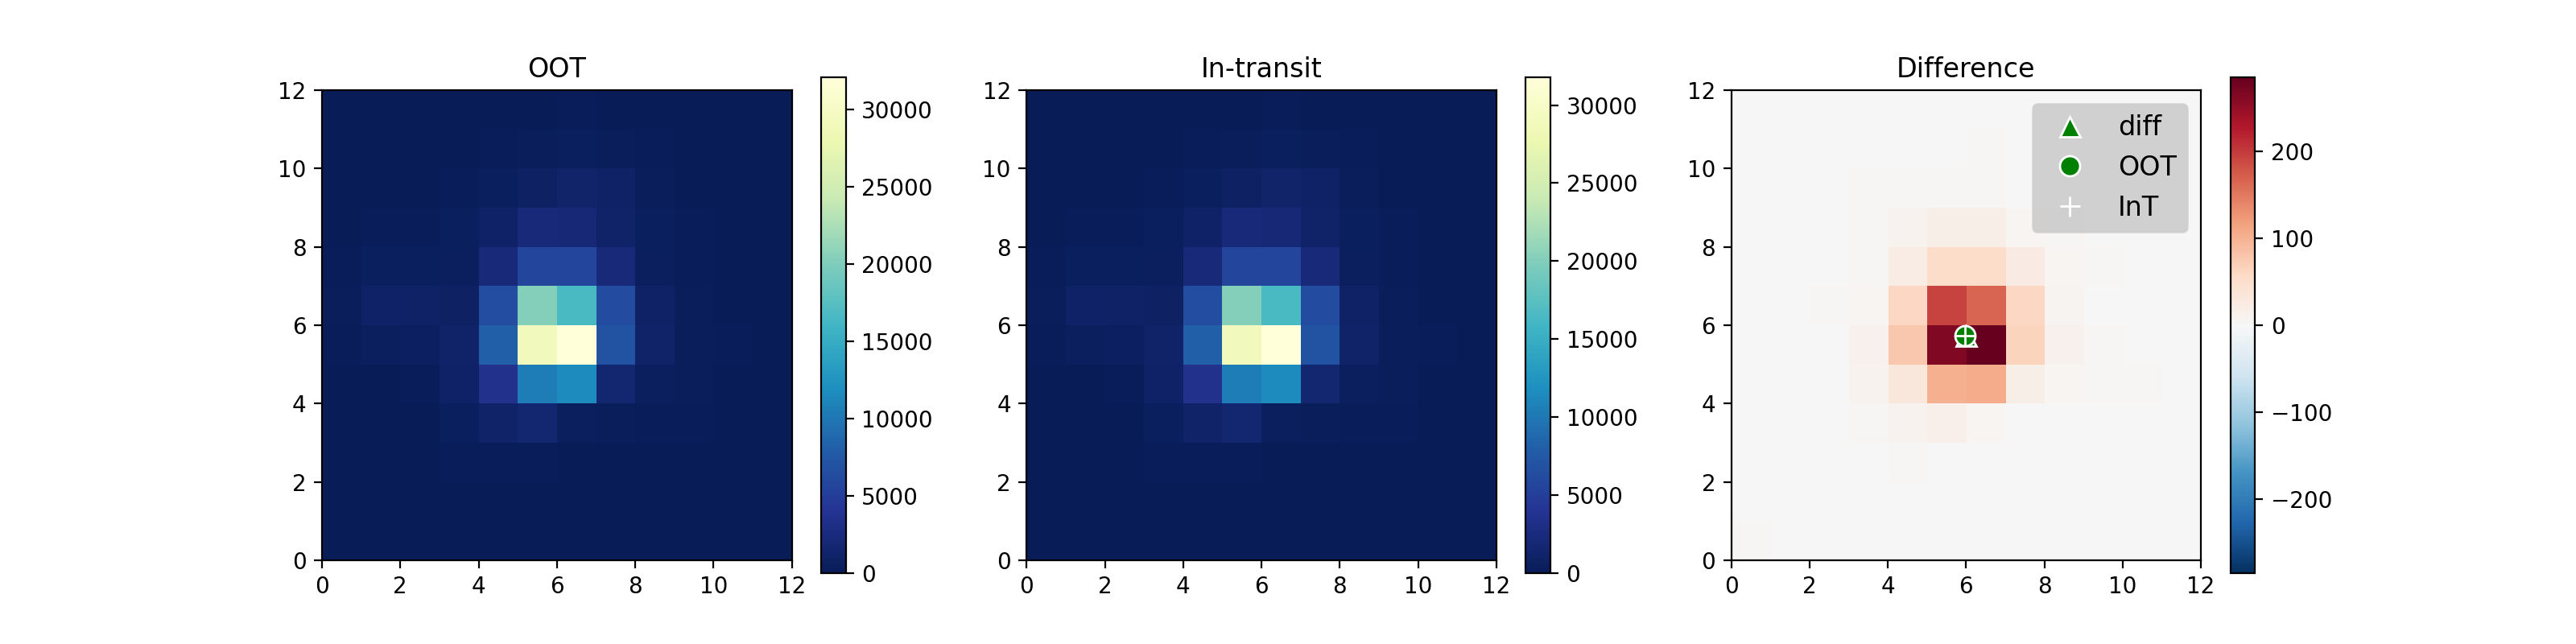

/user/mdallas/exovetter_project/exovetter_working_code/exovetter/exovetter/centroid/centroid.py:271: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


<IPython.core.display.Javascript object>


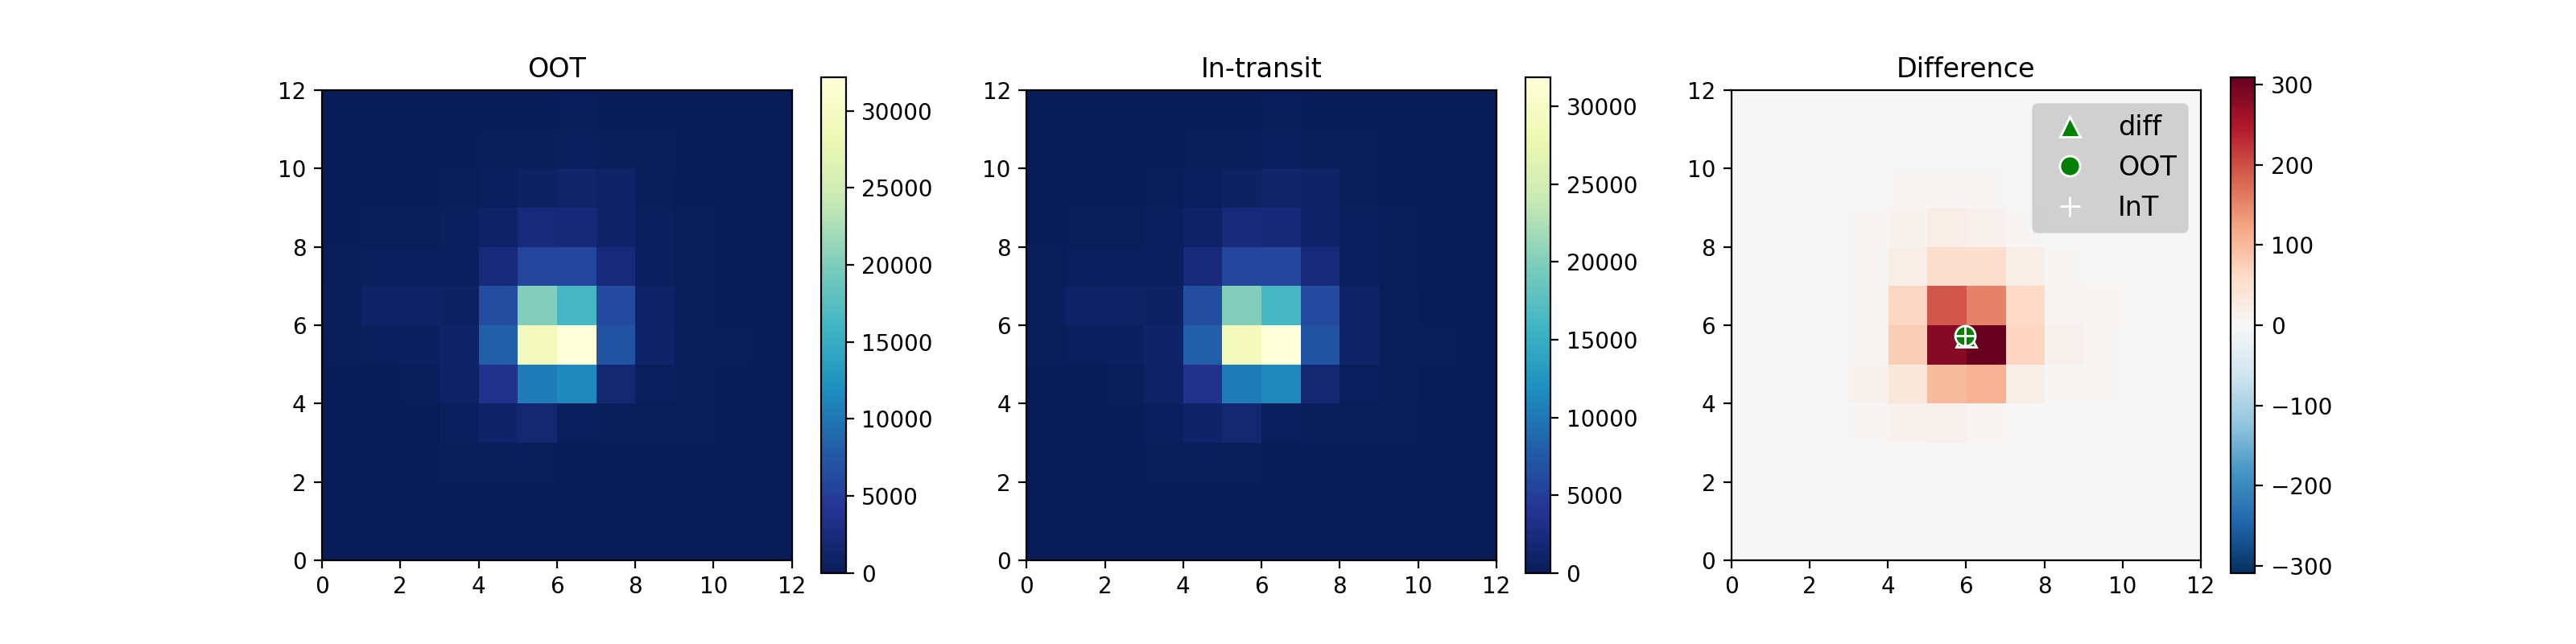

<IPython.core.display.Javascript object>


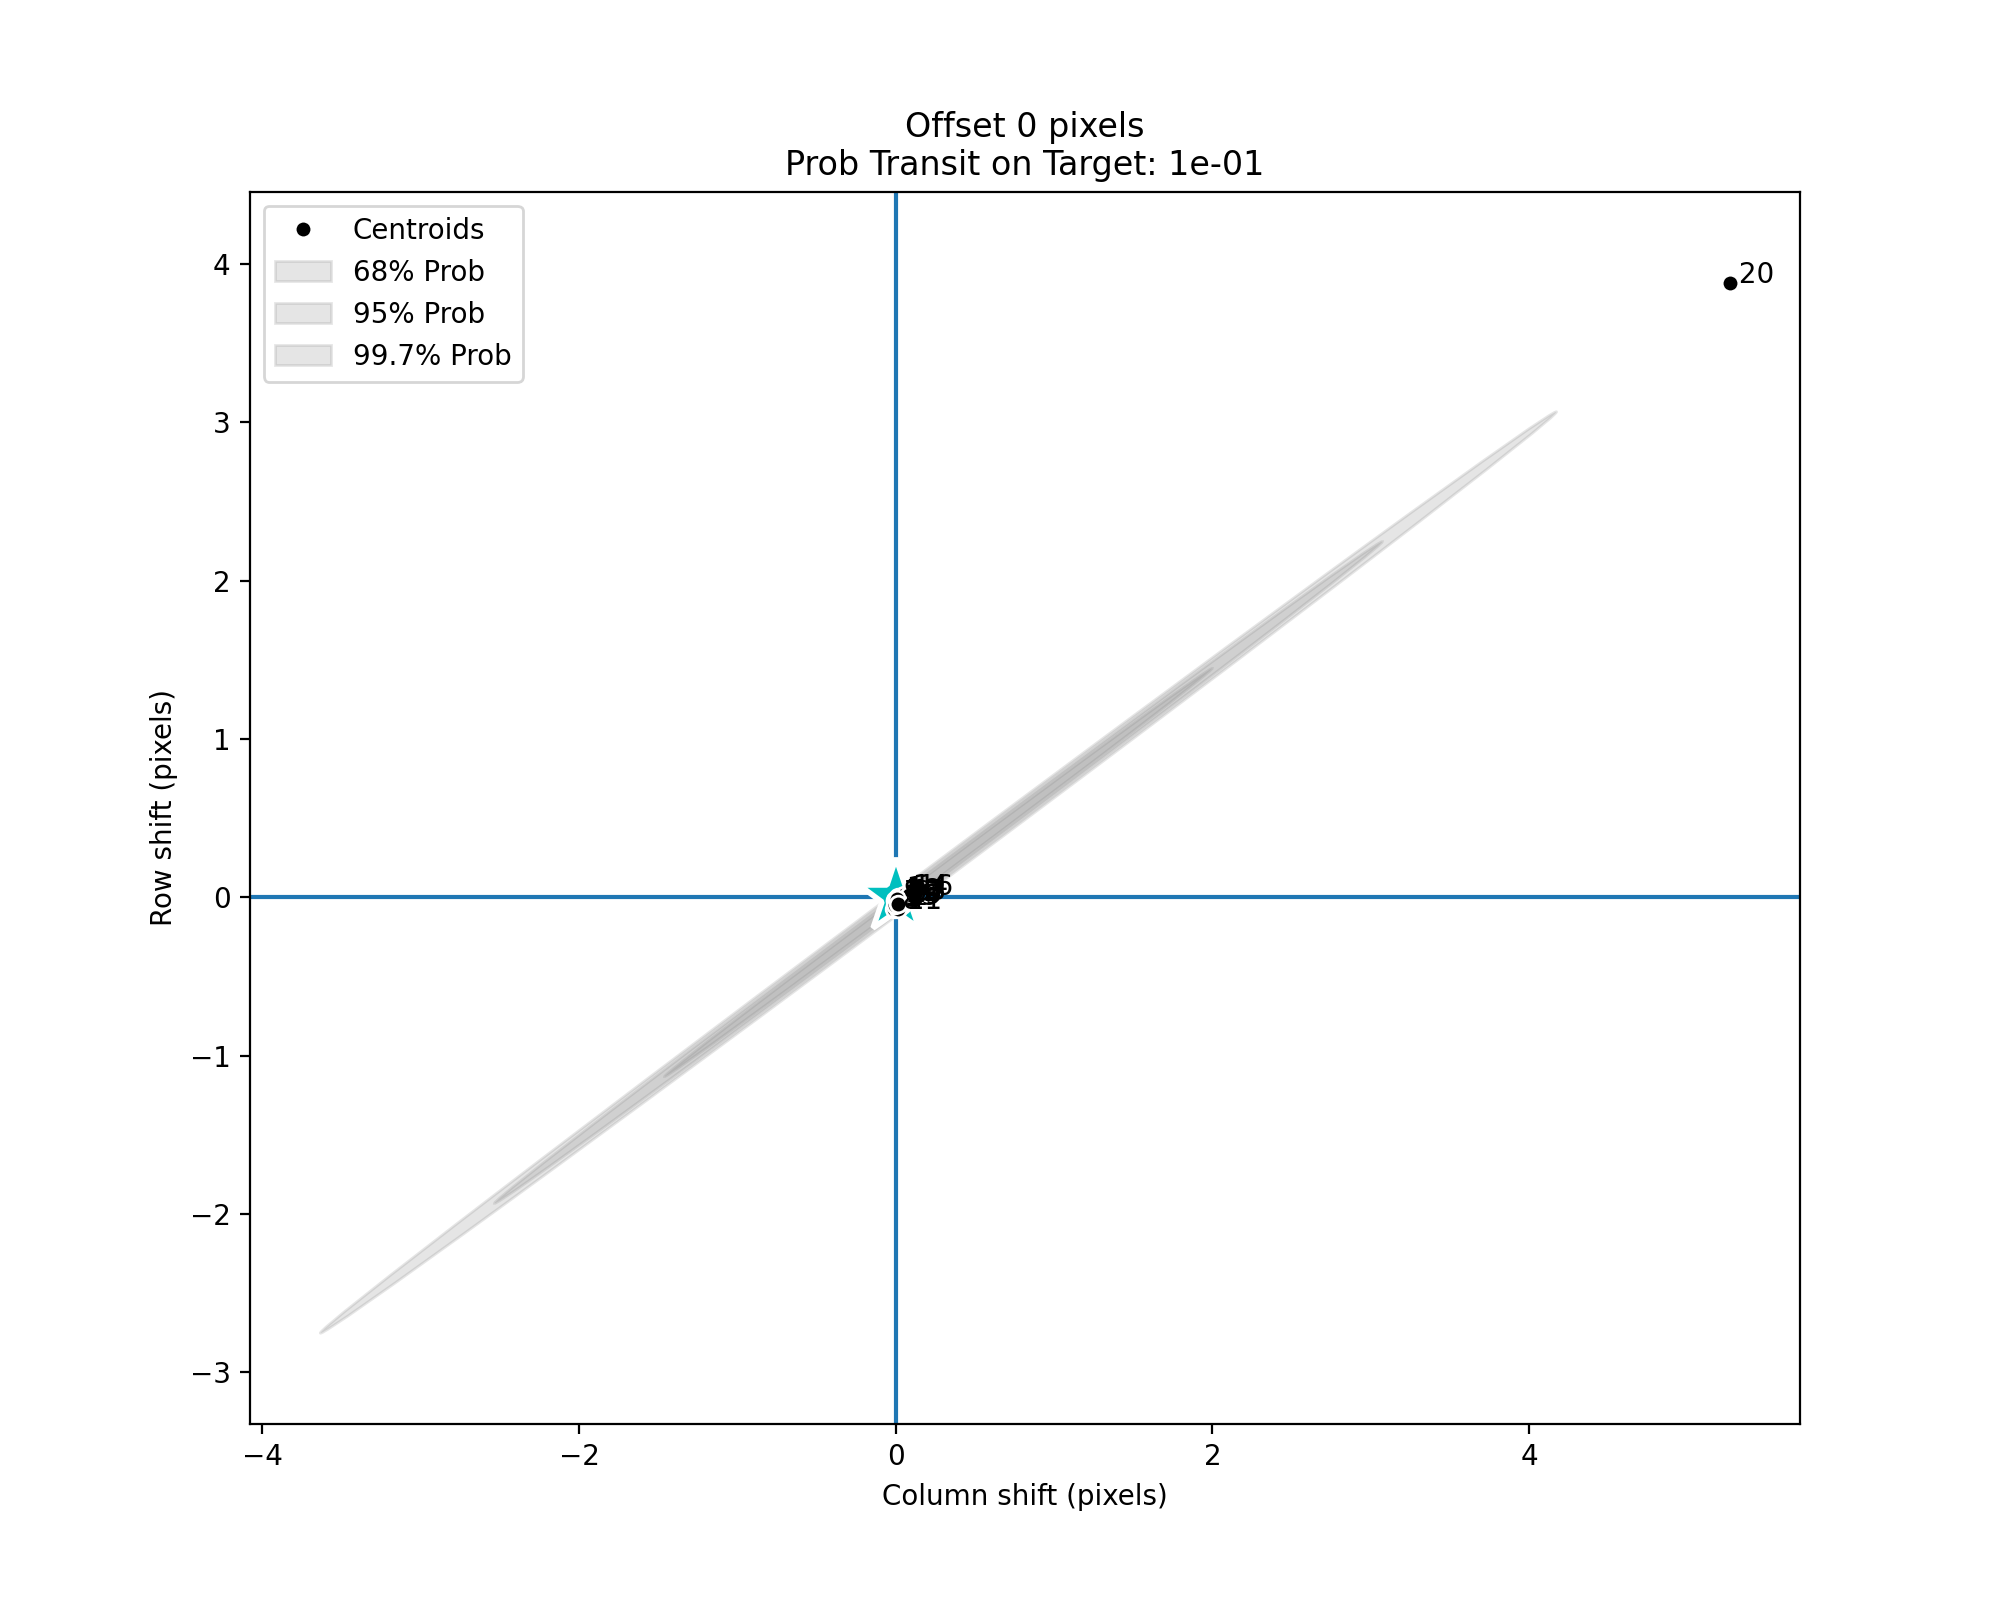

In [6]:
# We can also use the built in plot method to visualize the results
centroid.plot()

# The plot parameter can also be set to True when running the vetter, ie centroid.run(tce, tpf, plot=True)


In [ ]:
import numpy as np
np.shape(tpf.flux)